<a href="https://colab.research.google.com/github/BhanuSrihridai/Chatbot-with-OpenAI-endpoint/blob/main/Promilo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [151]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from itertools import combinations

import warnings
warnings.filterwarnings("ignore")

## Loading the data set

In [2]:
data=pd.read_excel("Promilo_BA.xlsx")
# data.head()

## Getting the list of sheets in the dataset

In [3]:
ex_Book=pd.ExcelFile("Promilo_BA.xlsx")
sheets=ex_Book.sheet_names
sheets

['Report Snapshot',
 'User Acquisition',
 'Traffic Aquisition',
 'Event Report',
 'Conversion Report',
 'Pages & Screens Report',
 'Retention Overview',
 'User Engagement Overview',
 'Demographics Report',
 'Citywise Report',
 'Gender Report',
 'User By Interest',
 'User by Language',
 'User By Age',
 'Google Ads Report']

## Exploring each sheet

### 1. Report Snapshot

In [7]:
data_report_snap=pd.read_excel("Promilo_BA.xlsx",sheet_name='Report Snapshot')

In [9]:
data_report_snap

""


This sheet contains no data except a picture.

### 2. User Acquisition

In [12]:
data_user_aqs=pd.read_excel("Promilo_BA.xlsx",sheet_name='User Acquisition')
data_user_aqs

,First user default channel group,New users,Engaged sessions,Engagement rate,Engaged sessions per user,Average engagement time,Event count,Conversions,Total revenue
0,Display,9957,12008,0.544457,1.206107,58.86209,204820,37434,0
1,Organic Search,7652,18141,0.813680,2.367041,534.31280,770710,109801,0
2,Paid Search,3025,4408,0.474284,1.458154,102.23780,81997,14770,0
3,Direct,1903,4975,0.318808,2.261364,1128.88100,227434,31093,0
4,Unassigned,325,1619,0.813159,4.981538,798.34150,33320,789,0
5,Organic Social,10,13,0.722222,1.300000,145.30000,248,27,0


In [123]:
data_user_aqs.style.bar(cmap='icefire',height=50,width=55) # Adding internal bar charts to numerical columns for a sample of the data

,First user default channel group,New users,Engaged sessions,Engagement rate,Engaged sessions per user,Average engagement time,Event count,Conversions,Total revenue
0,Display,9957,12008,0.544457,1.206107,58.862090,204820,37434,0
1,Organic Search,7652,18141,0.813680,2.367041,534.312800,770710,109801,0
2,Paid Search,3025,4408,0.474284,1.458154,102.237800,81997,14770,0
3,Direct,1903,4975,0.318808,2.261364,1128.881000,227434,31093,0
4,Unassigned,325,1619,0.813159,4.981538,798.341500,33320,789,0
5,Organic Social,10,13,0.722222,1.300000,145.300000,248,27,0


In [29]:
data_user_aqs.shape

(6, 9)

In [42]:
data_user_aqs.describe().T

,count,mean,std,min,25%,50%,75%,max
New users,6.0,3812.000000,4083.739659,10.000000,719.500000,2464.000000,6495.250000,9957.000000
Engaged sessions,6.0,6860.666667,6894.604867,13.000000,2316.250000,4691.500000,10249.750000,18141.000000
Engagement rate,6.0,0.614435,0.201367,0.318808,0.491827,0.633339,0.790425,0.813680
Engaged sessions per user,6.0,2.262367,1.420806,1.206107,1.339538,1.859759,2.340622,4.981538
Average engagement time,6.0,461.322532,437.111008,58.862090,113.003350,339.806400,732.334325,1128.881000
Event count,6.0,219754.833333,284869.104021,248.000000,45489.250000,143408.500000,221780.500000,770710.000000
Conversions,6.0,32319.000000,40929.227185,27.000000,4284.250000,22931.500000,35848.750000,109801.000000
Total revenue,6.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [44]:
data_user_aqs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 9 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   First user default channel group  6 non-null      object 
 1   New users                         6 non-null      int64  
 2   Engaged sessions                  6 non-null      int64  
 3   Engagement rate                   6 non-null      float64
 4   Engaged sessions per user         6 non-null      float64
 5   Average engagement time           6 non-null      float64
 6   Event count                       6 non-null      int64  
 7   Conversions                       6 non-null      int64  
 8   Total revenue                     6 non-null      int64  
dtypes: float64(3), int64(5), object(1)
memory usage: 560.0+ bytes


In [45]:
data_user_aqs.duplicated().sum()

0

In [194]:
cols=data_user_aqs.columns                                              # Retreiving the columns of the data frame
cat_cols=data_user_aqs.select_dtypes(include='object').columns          # Retreiving the categorical columns
numeric_cols=data_user_aqs.select_dtypes(include='number').columns      # Retreiving the continuous/numerical columns
# numeric_cols
cat_cols

Index(['First user default channel group'], dtype='object')

In [266]:
def scatter_and_reg_plots(x,y):

  fig,axes=plt.subplots(2,1,figsize=(15,10))
  plt.subplots_adjust(hspace=0.5)

  fig1=sns.scatterplot(data=data_user_aqs,x=x,y=y,hue='First user default channel group',palette='magma',ax=axes[0]).set_title(f"Scatter plot of {x} vs {y}",fontweight='bold',fontsize=20)
  fig2=sns.regplot(data=data_user_aqs,x=x,y=y,color='orange',scatter_kws={"facecolors": "blue",'s':50,'edgecolor':'blue'},ax=axes[1]).set_title(f"Regression plot of {x} & {y}",fontweight='bold',fontsize=20)




In [ ]:
combis=list(combinations(numeric_cols,2))
combis

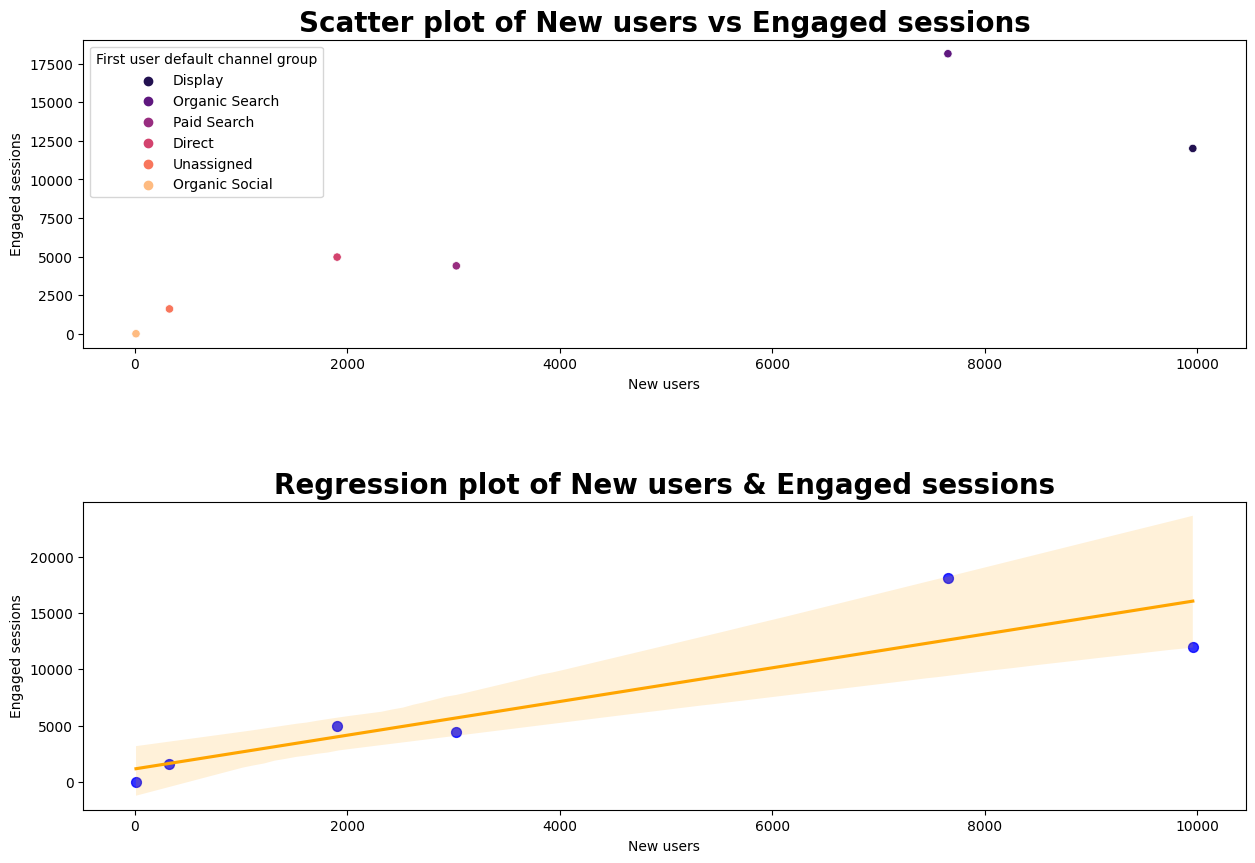

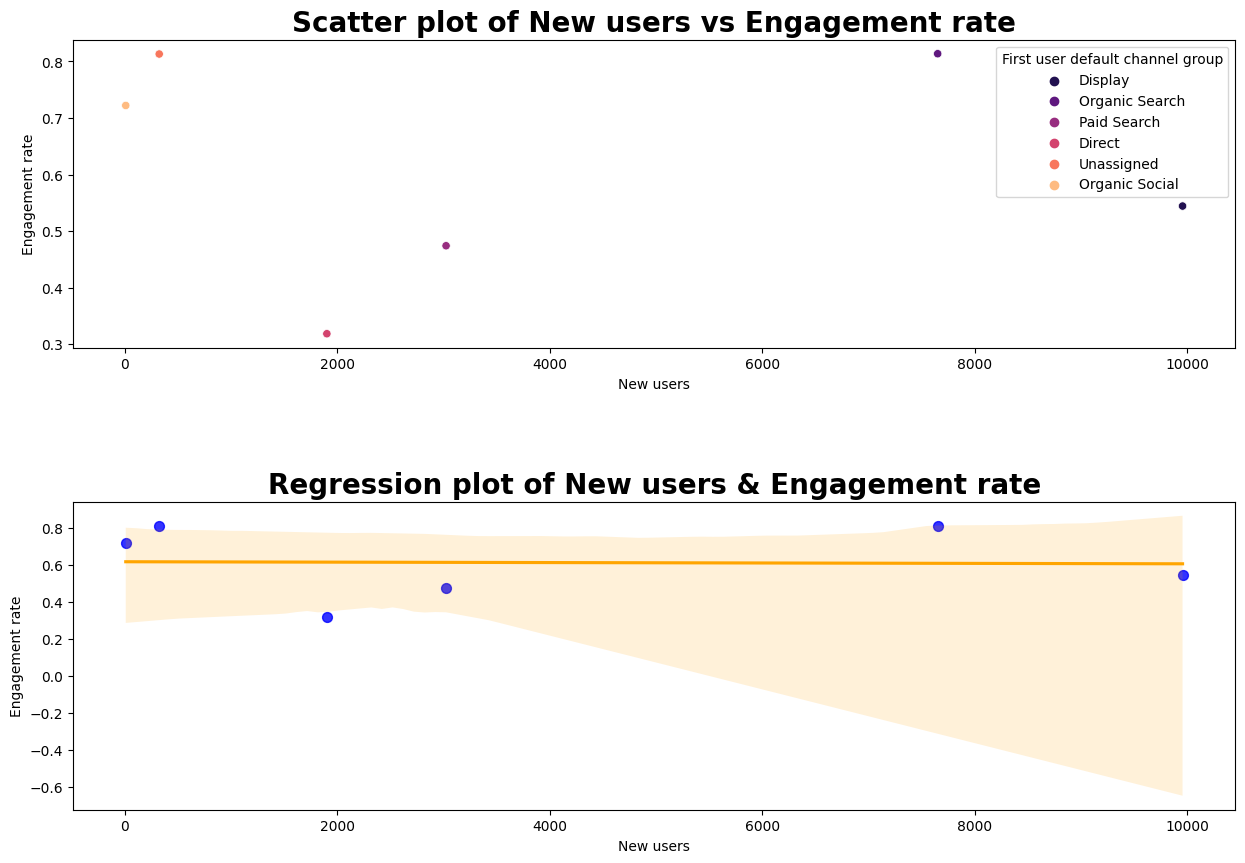

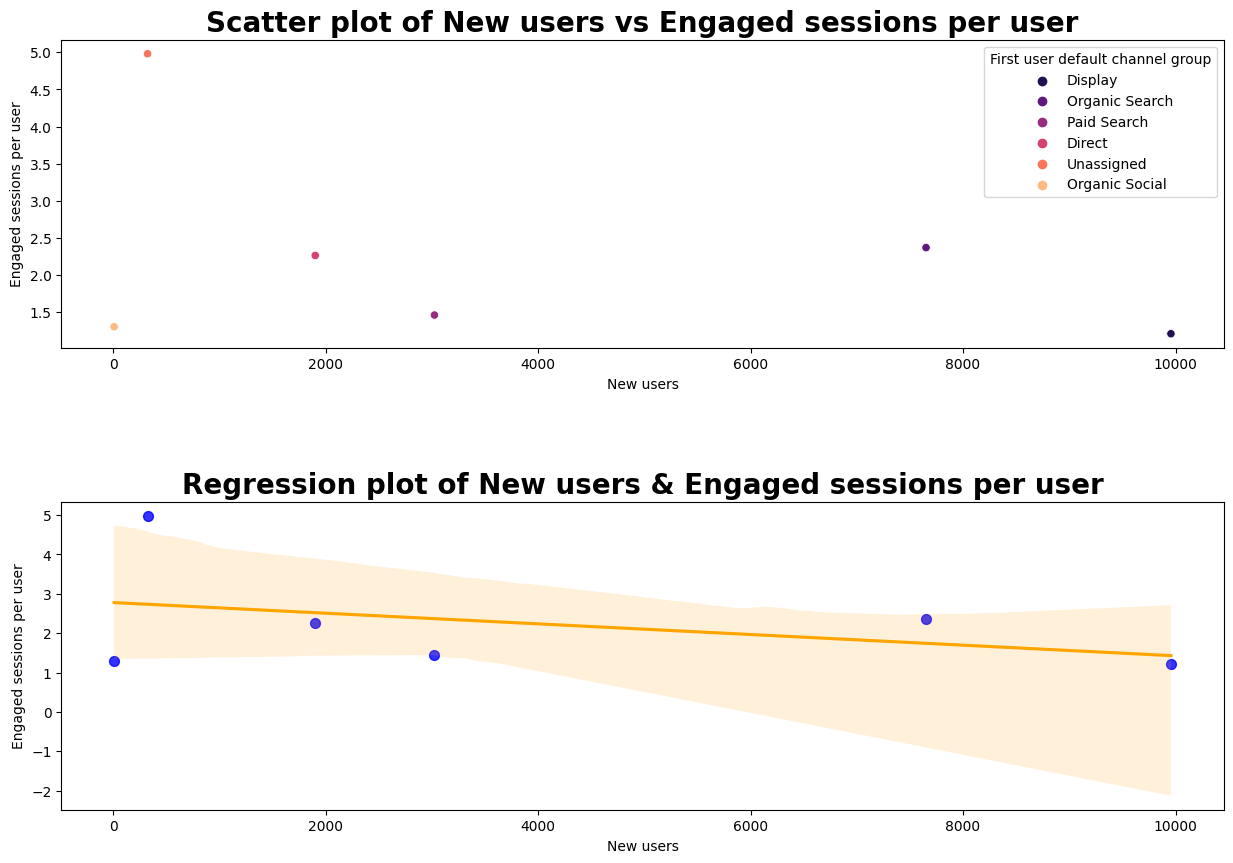

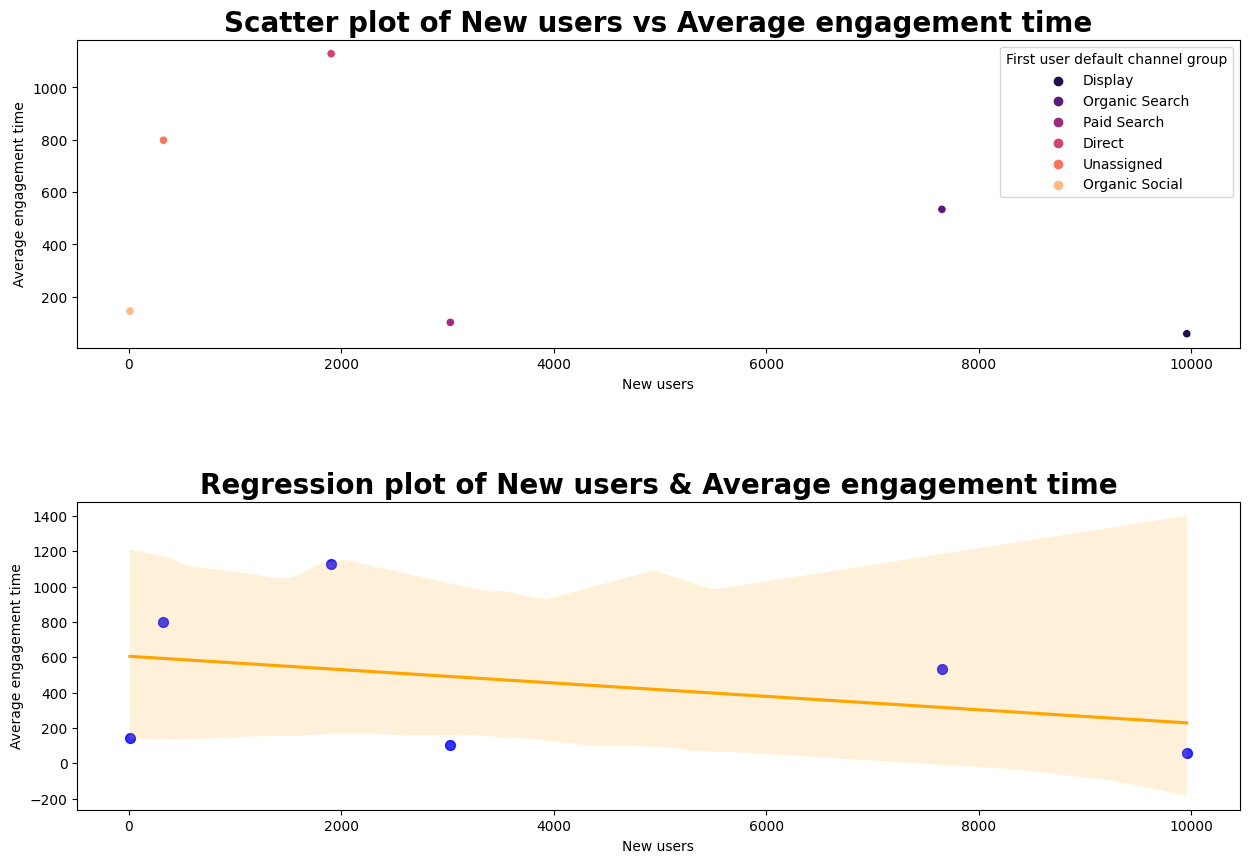

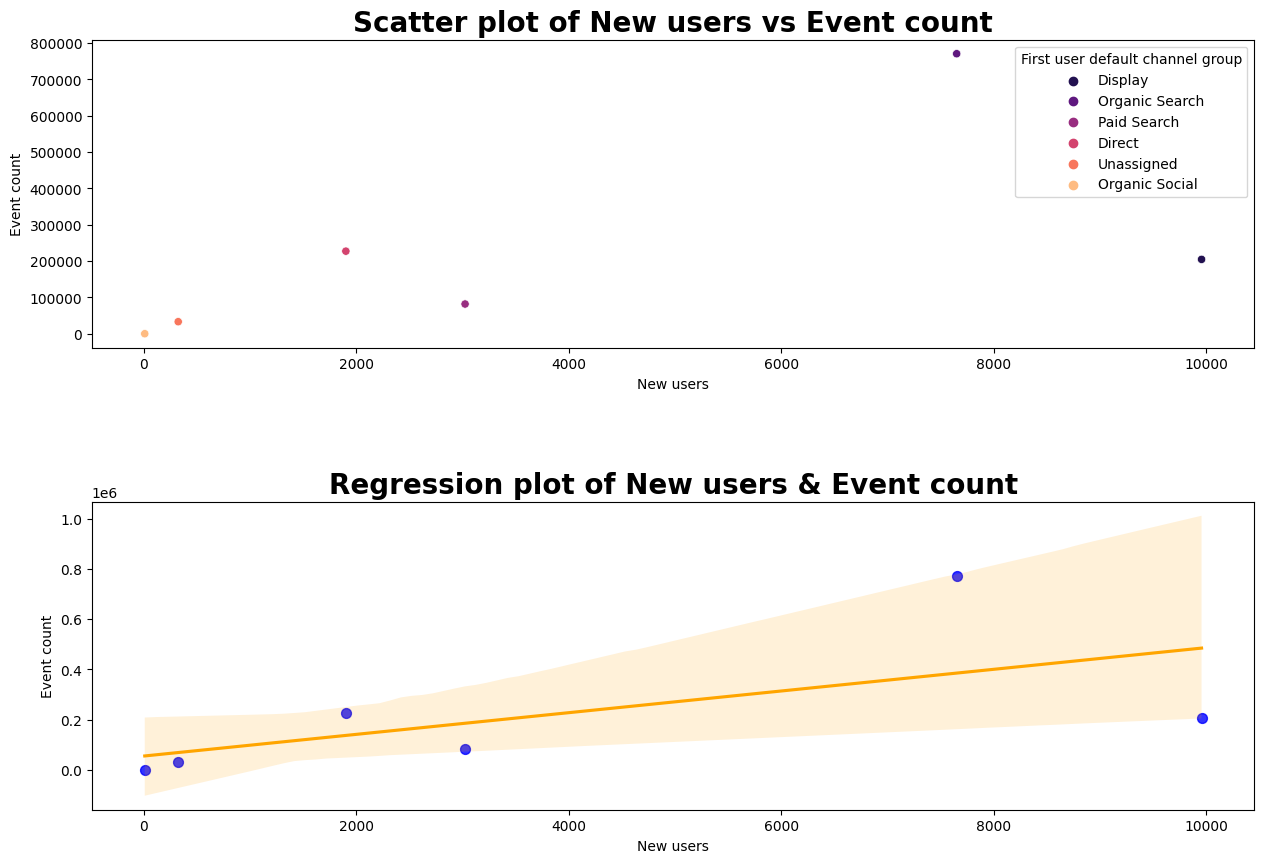

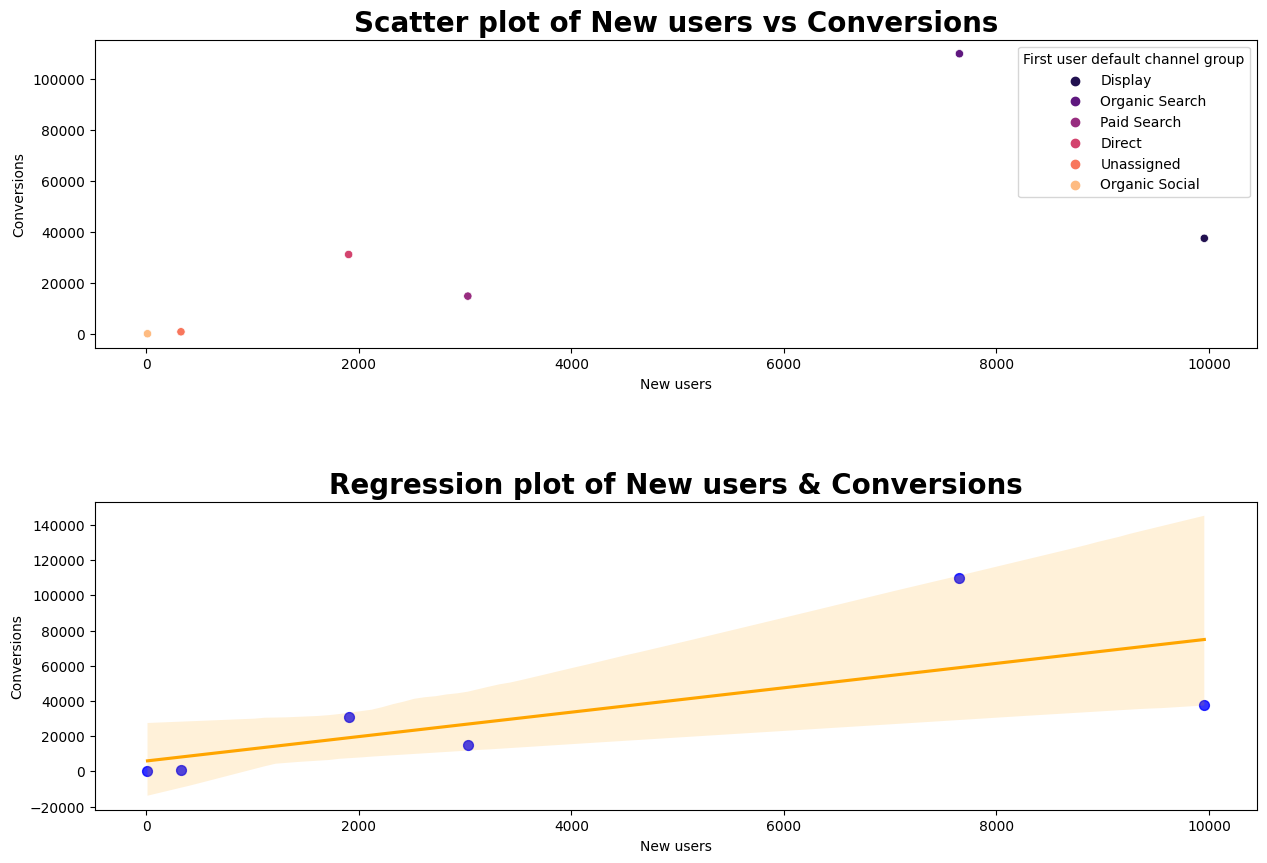

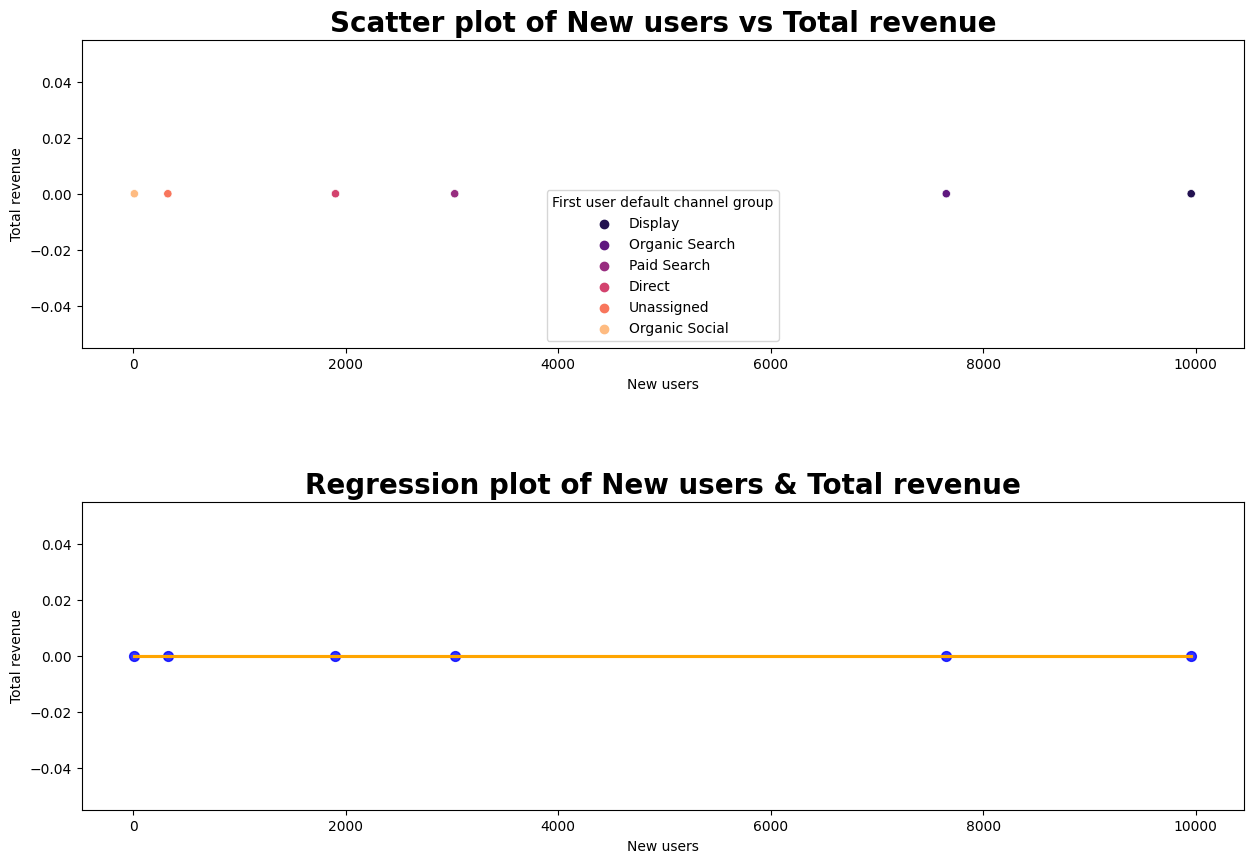

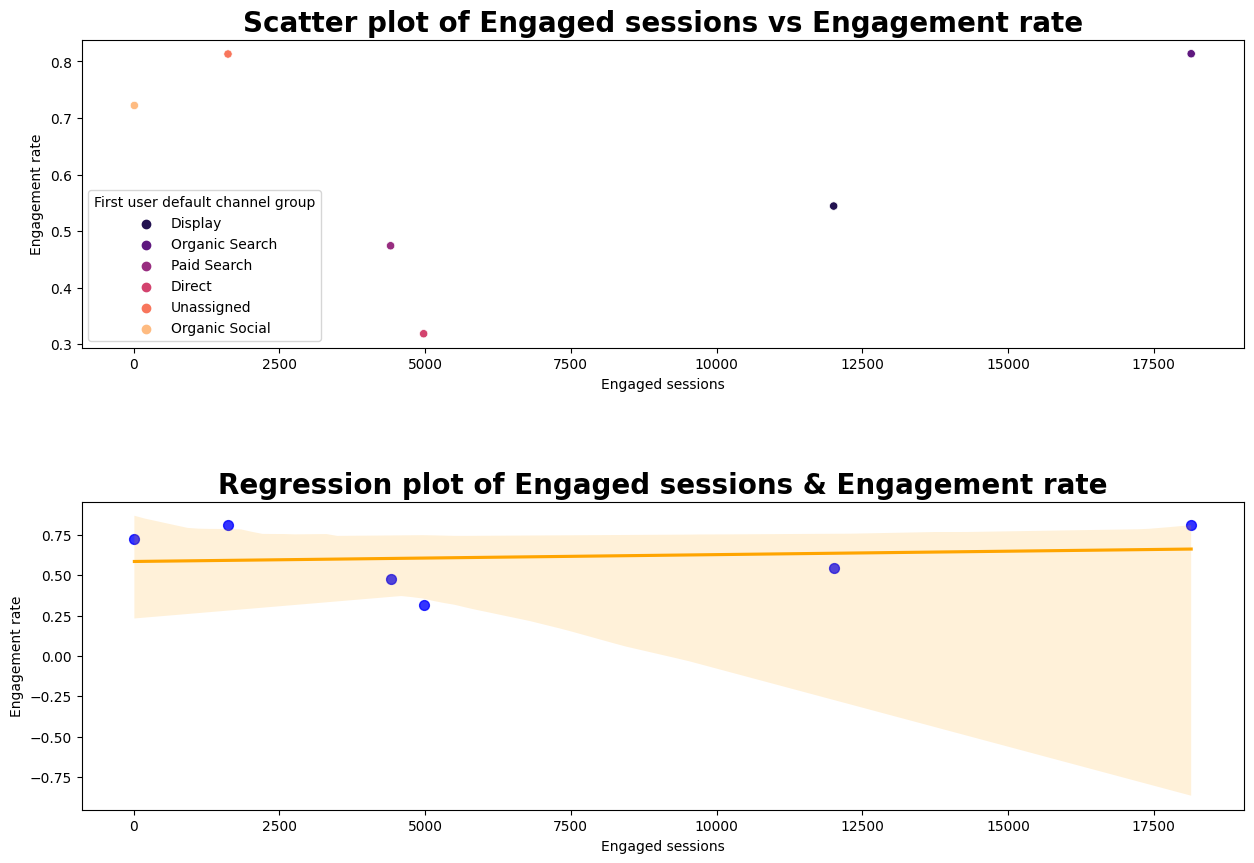

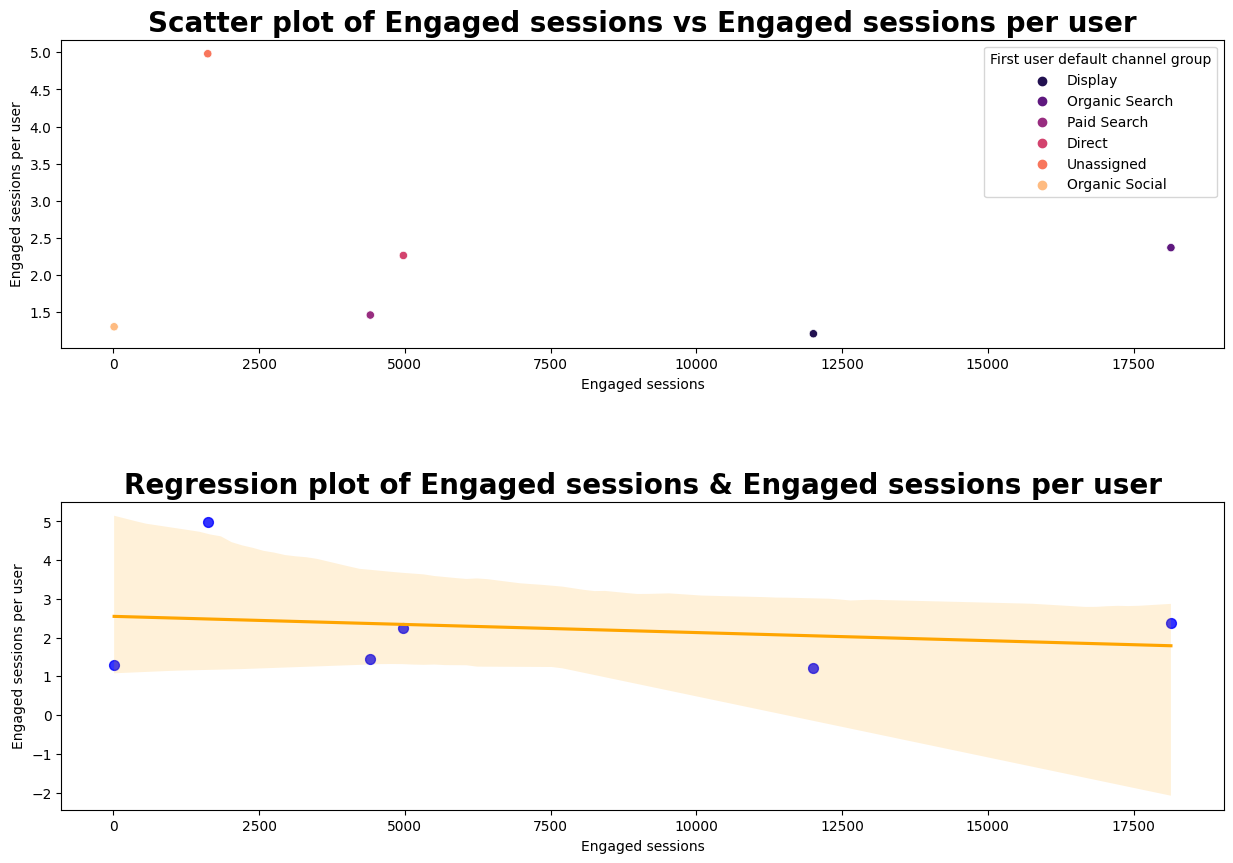

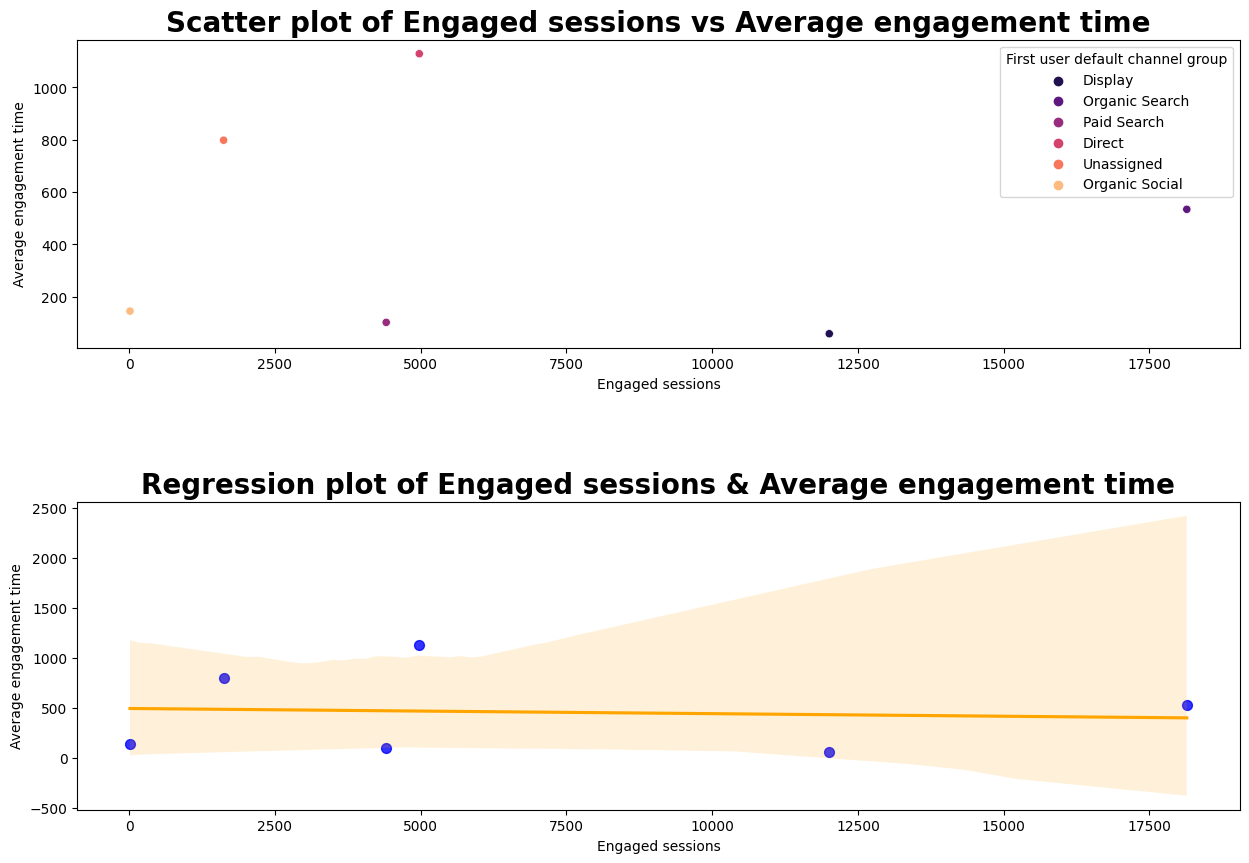

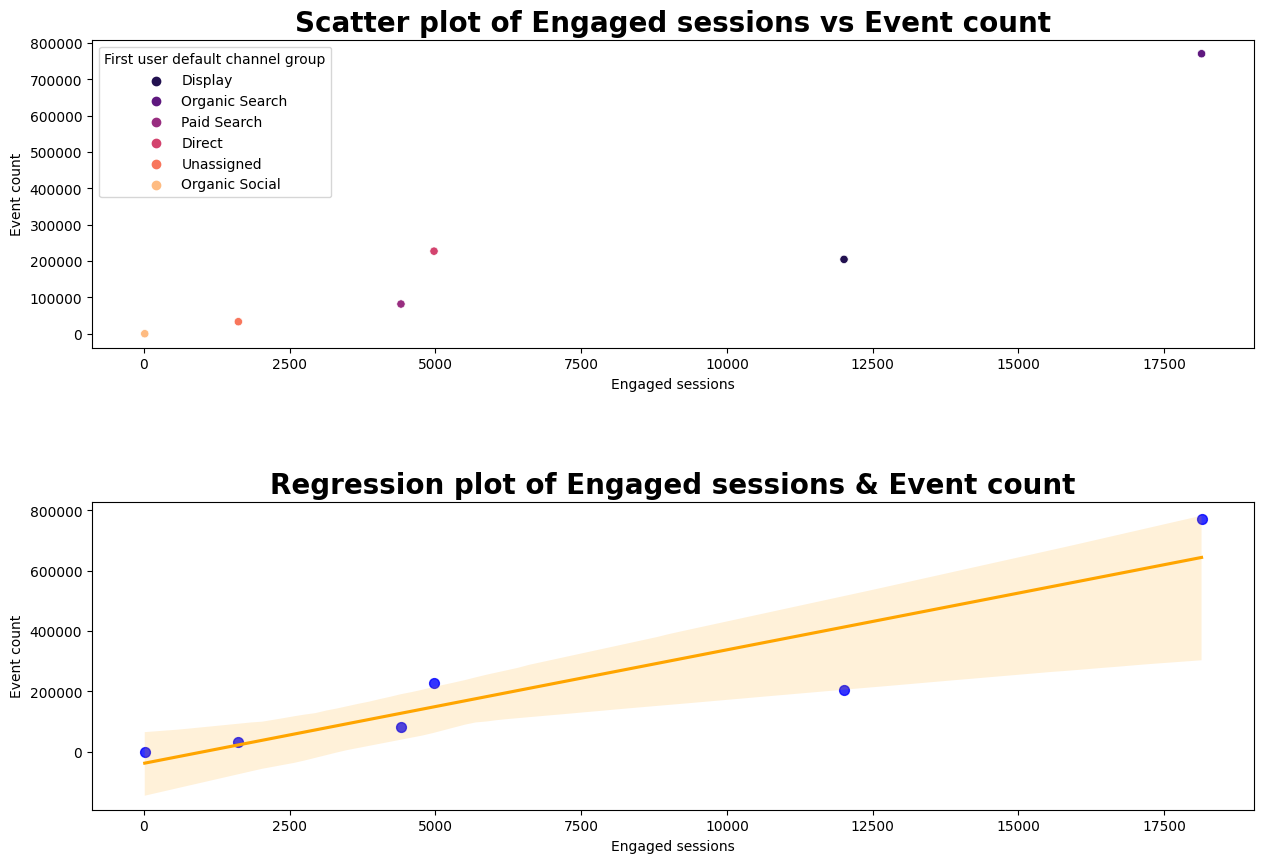

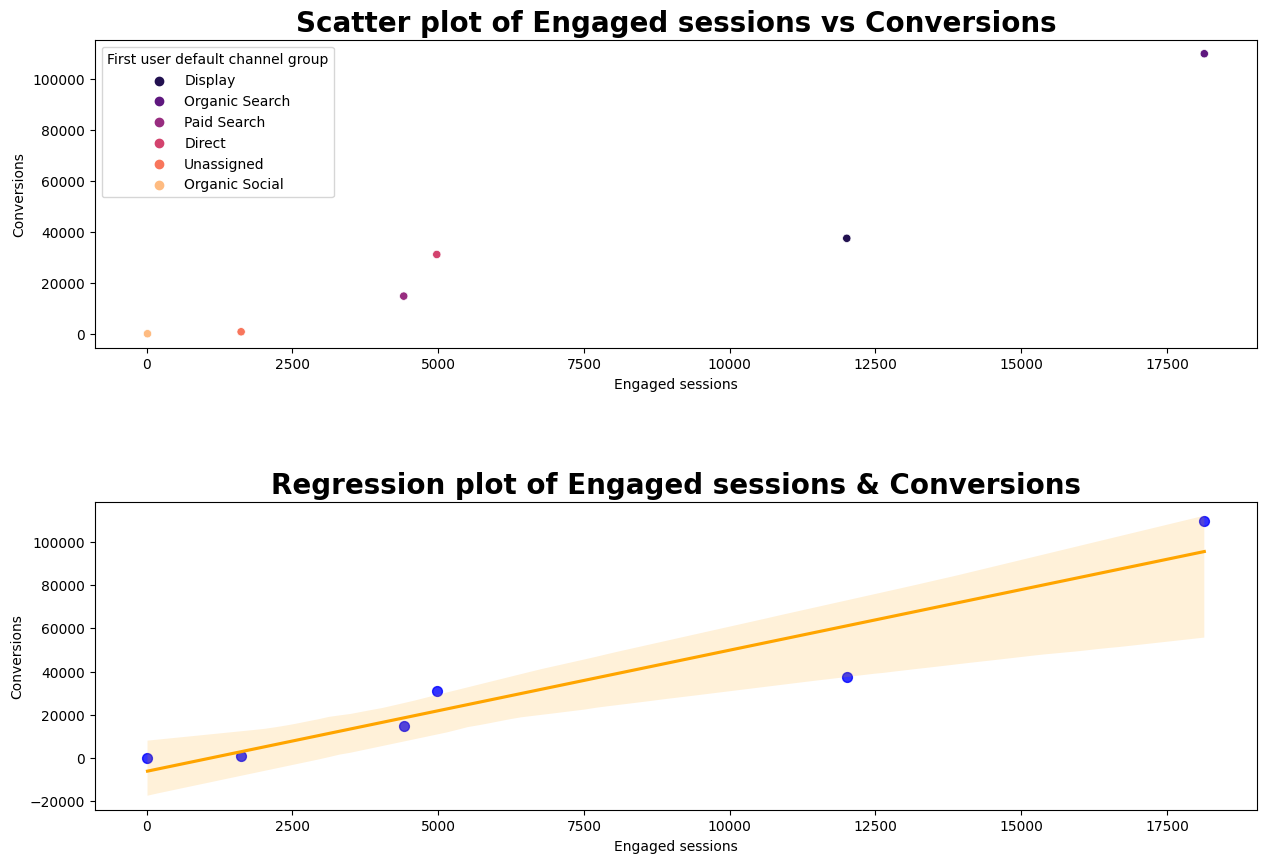

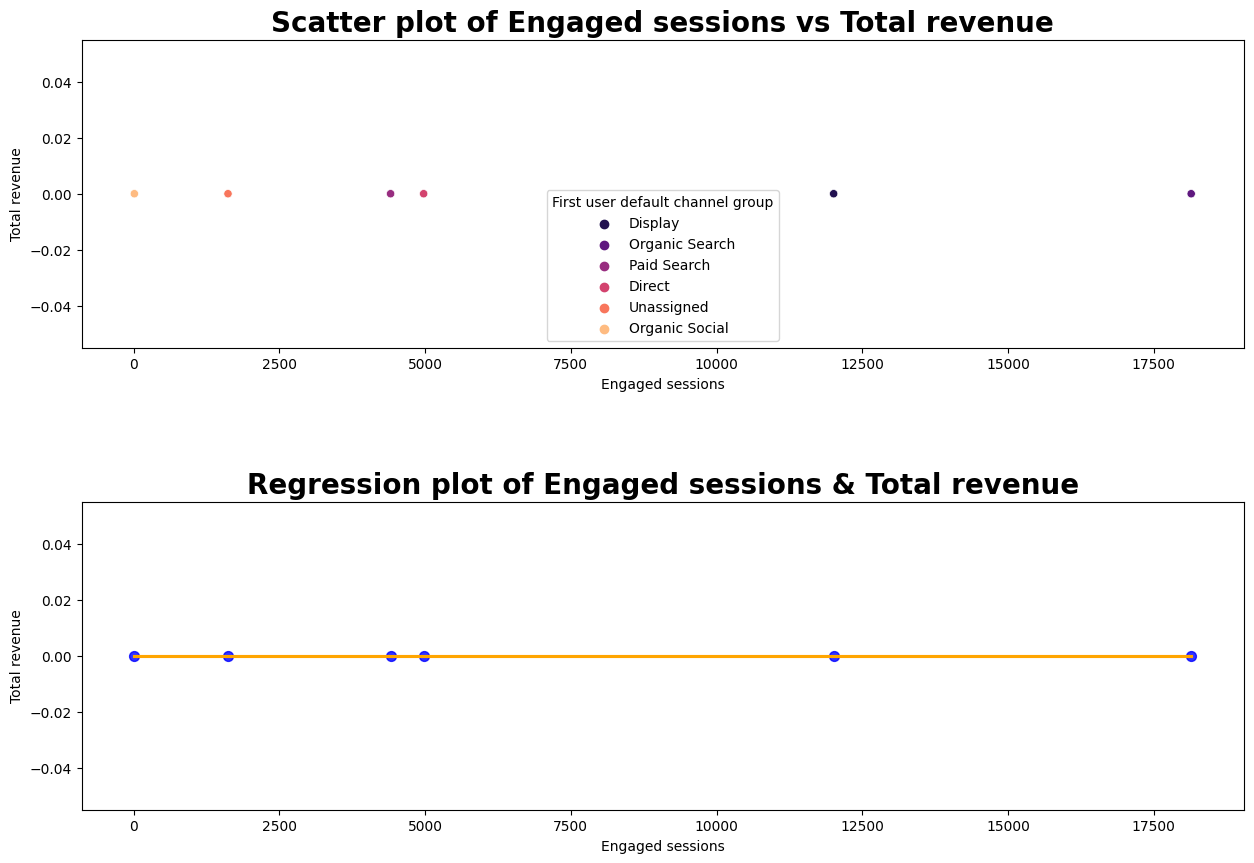

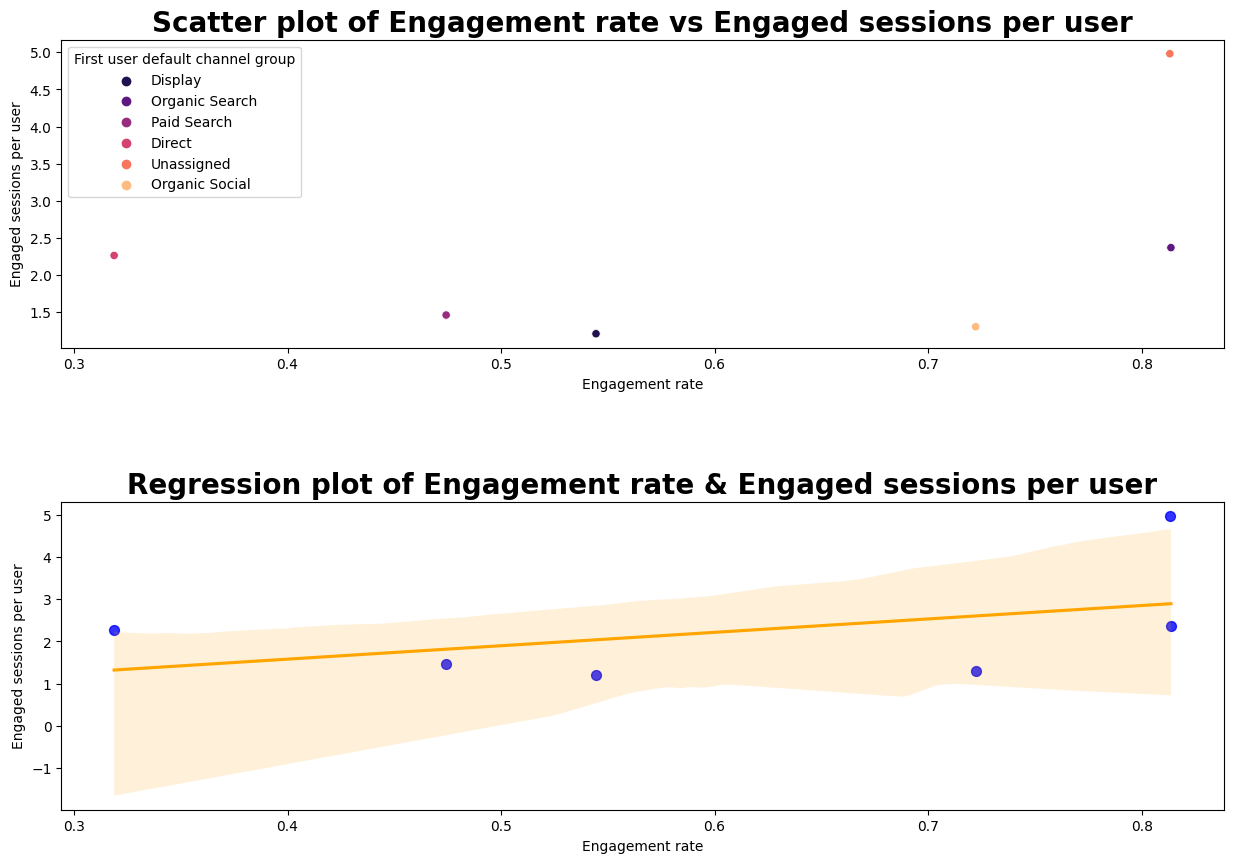

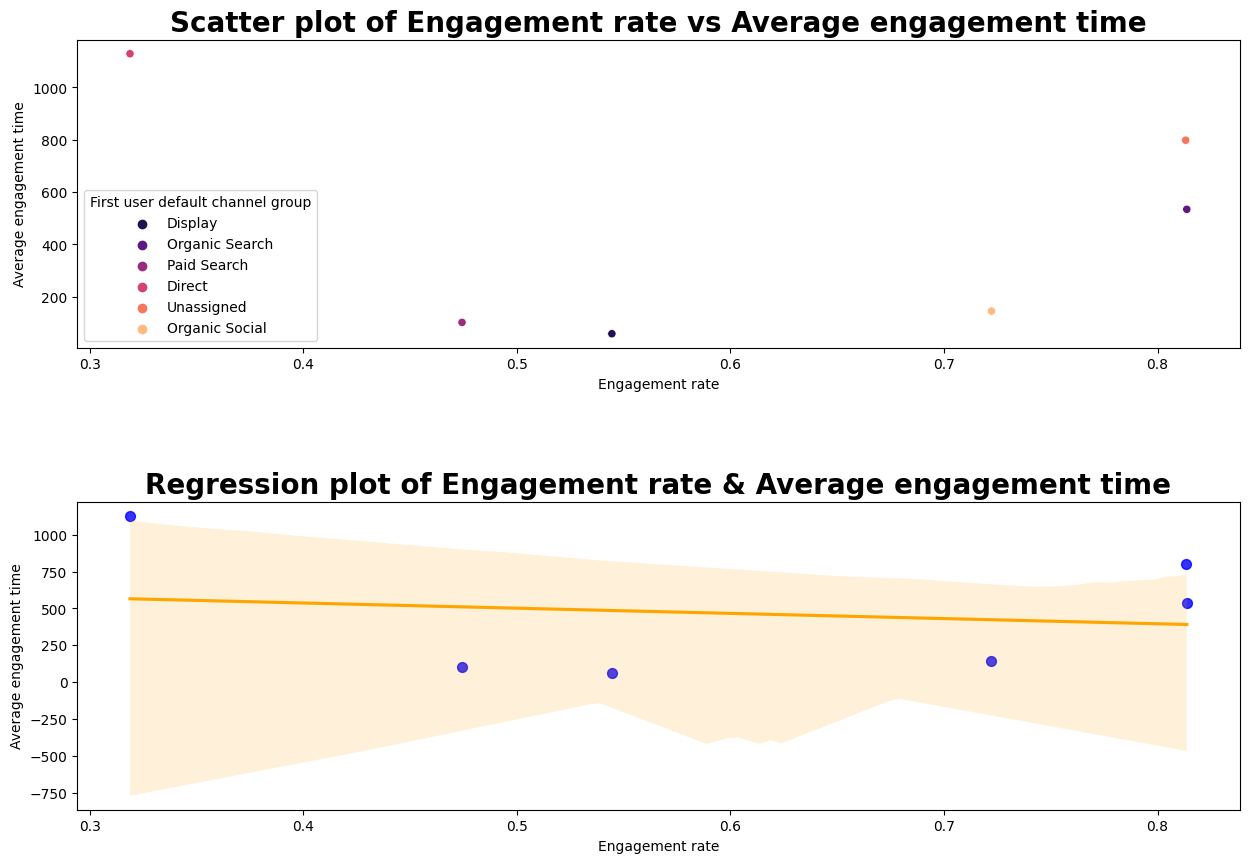

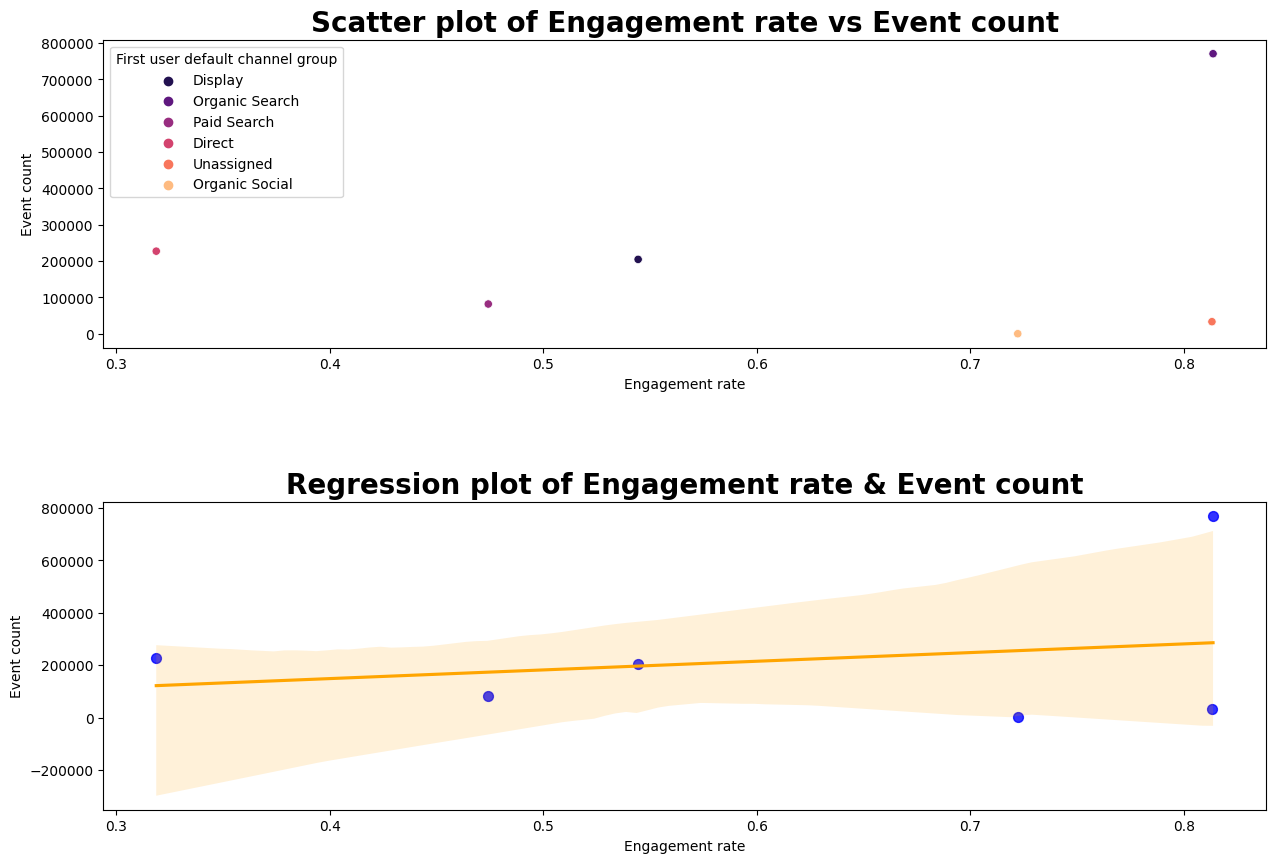

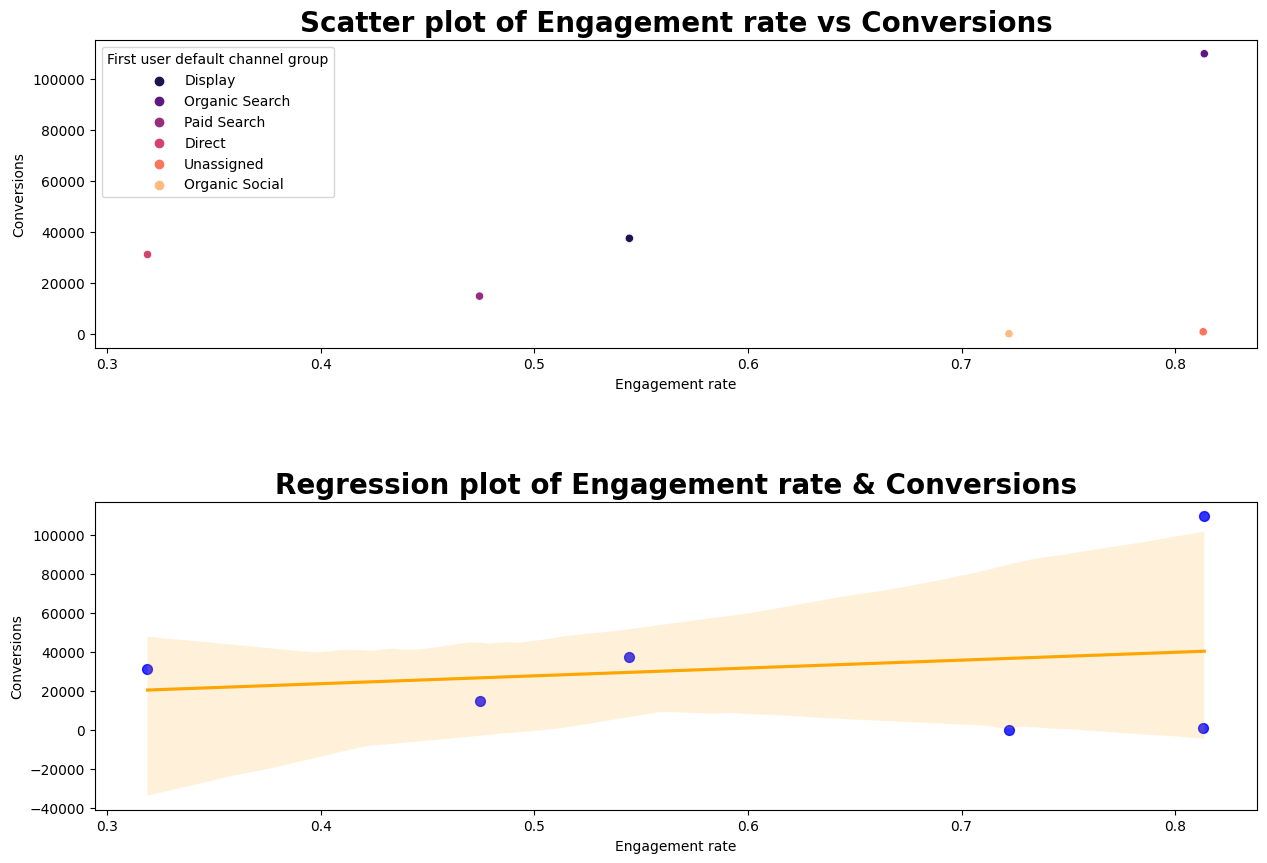

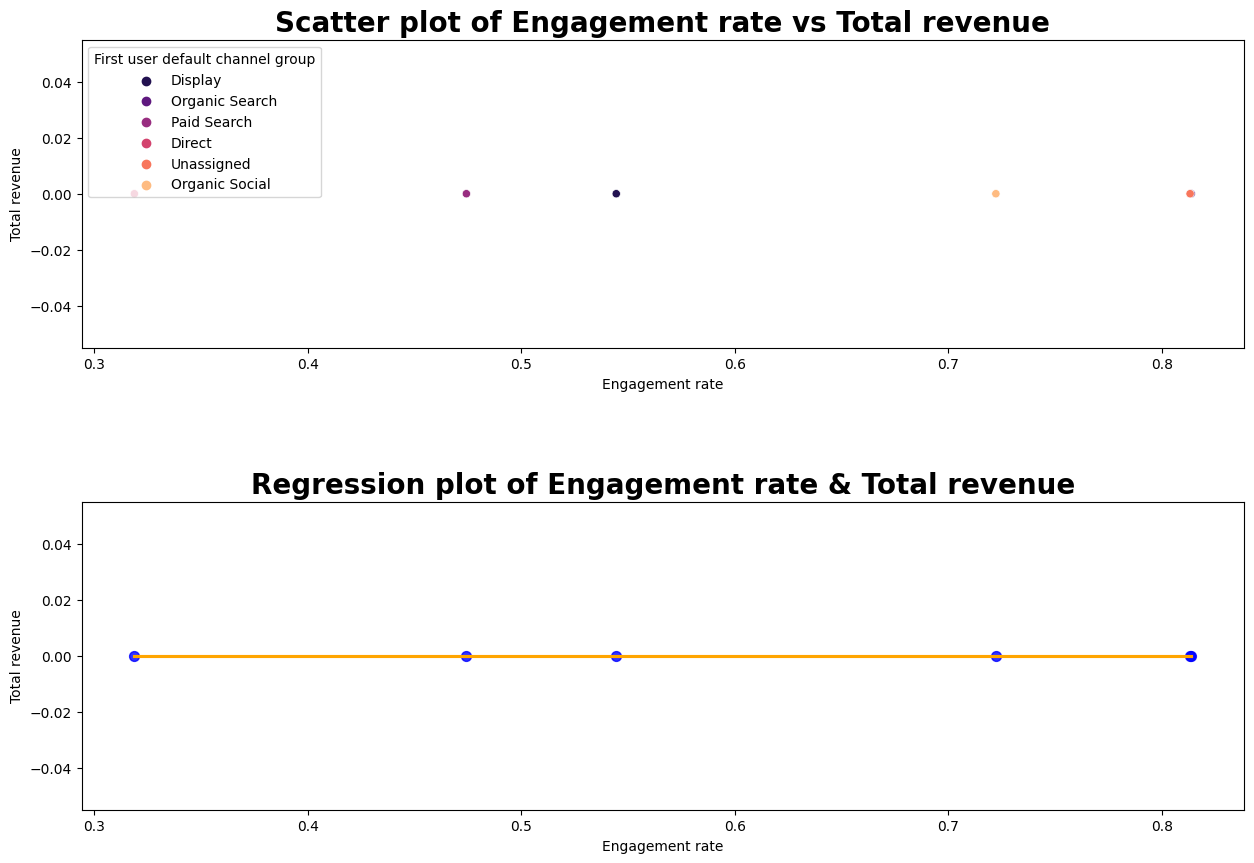

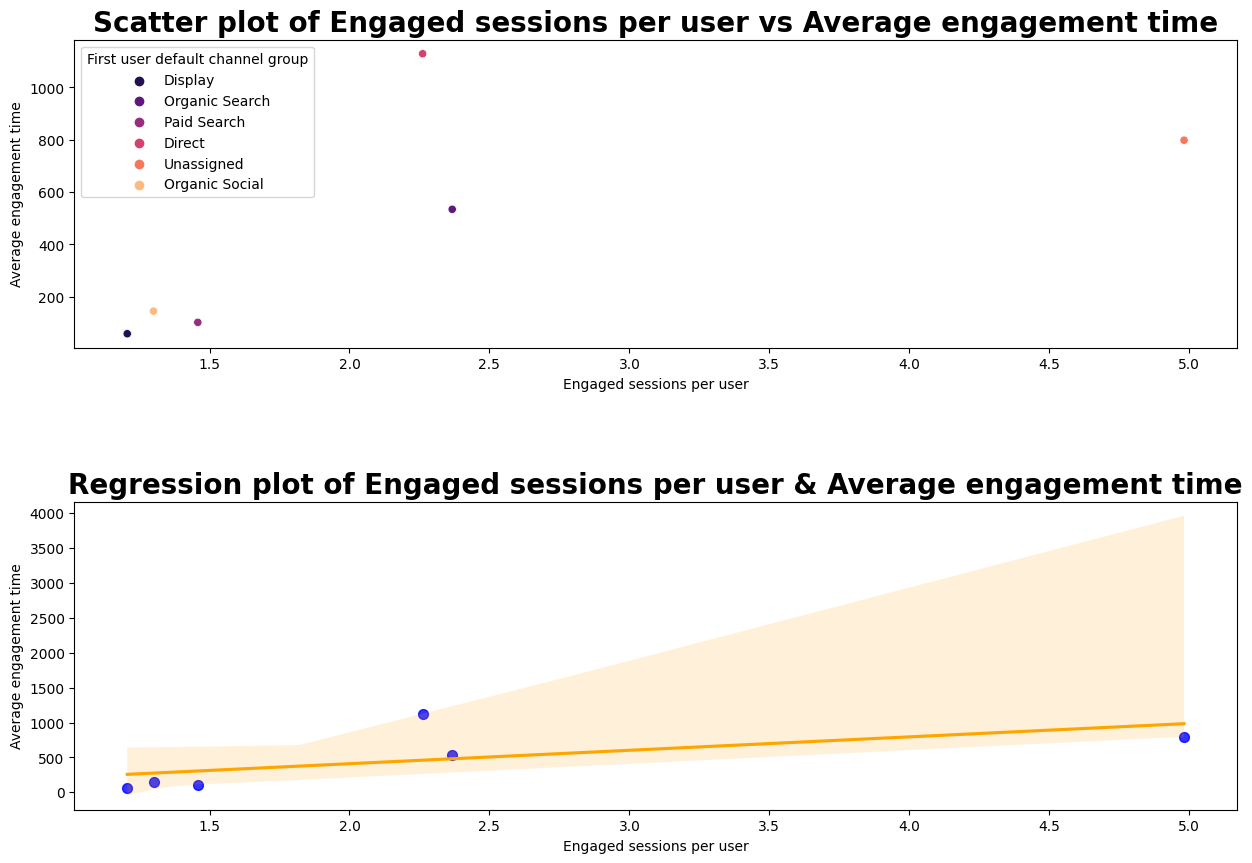

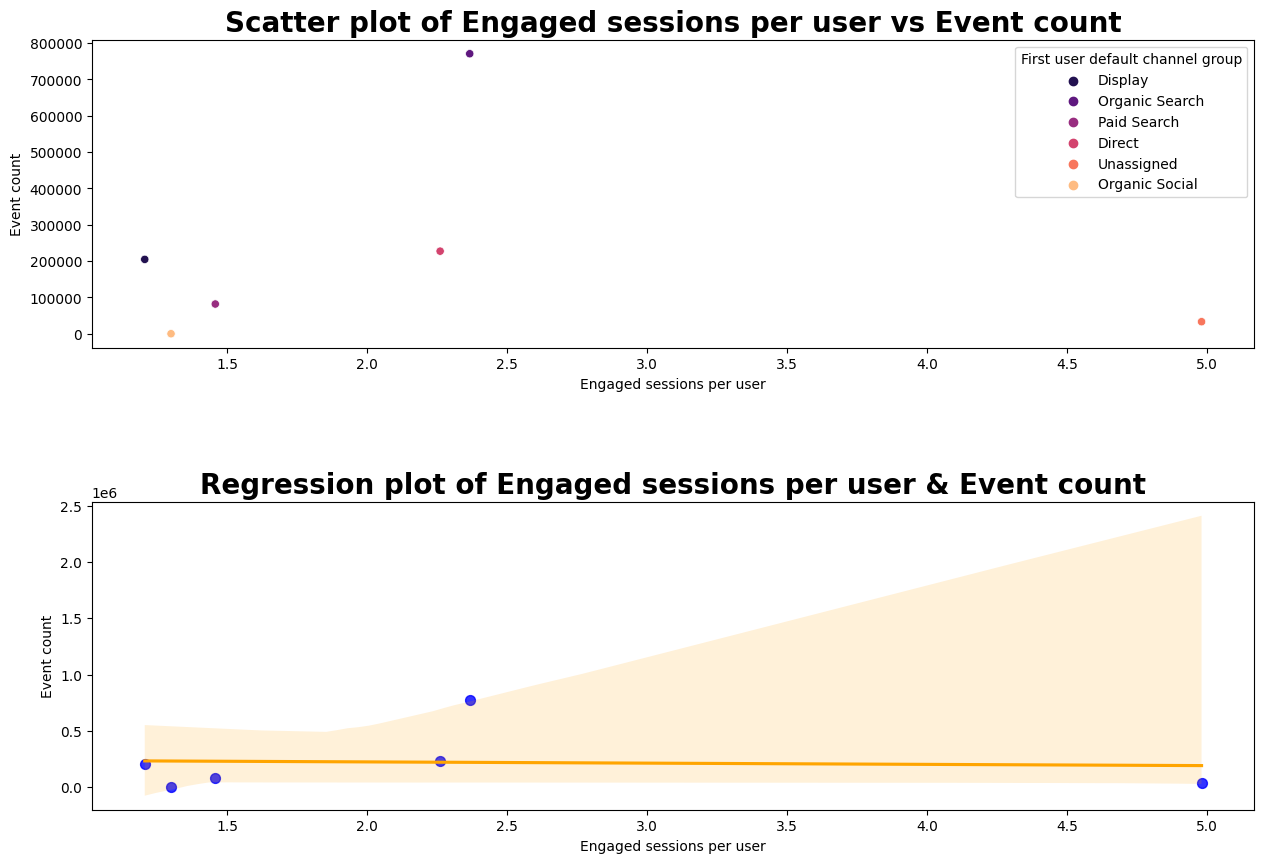

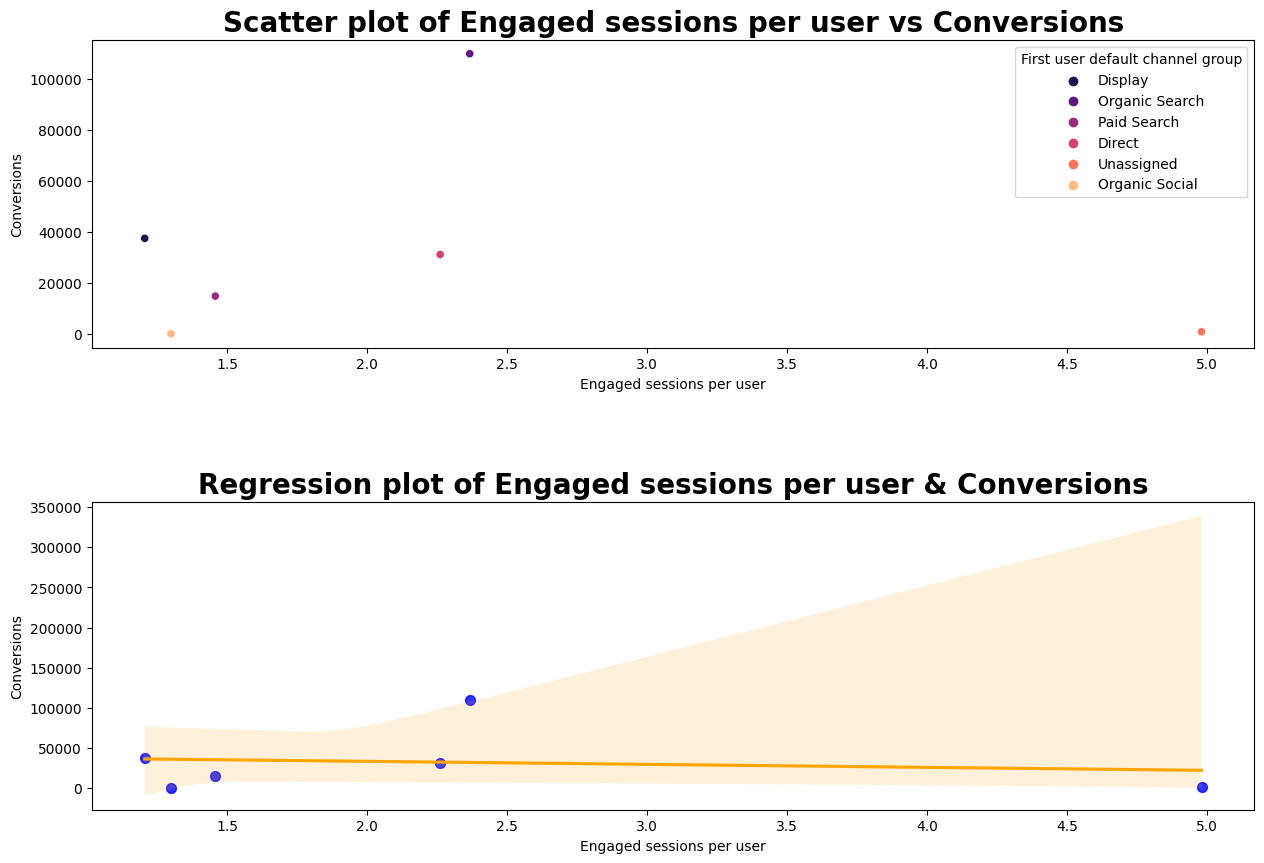

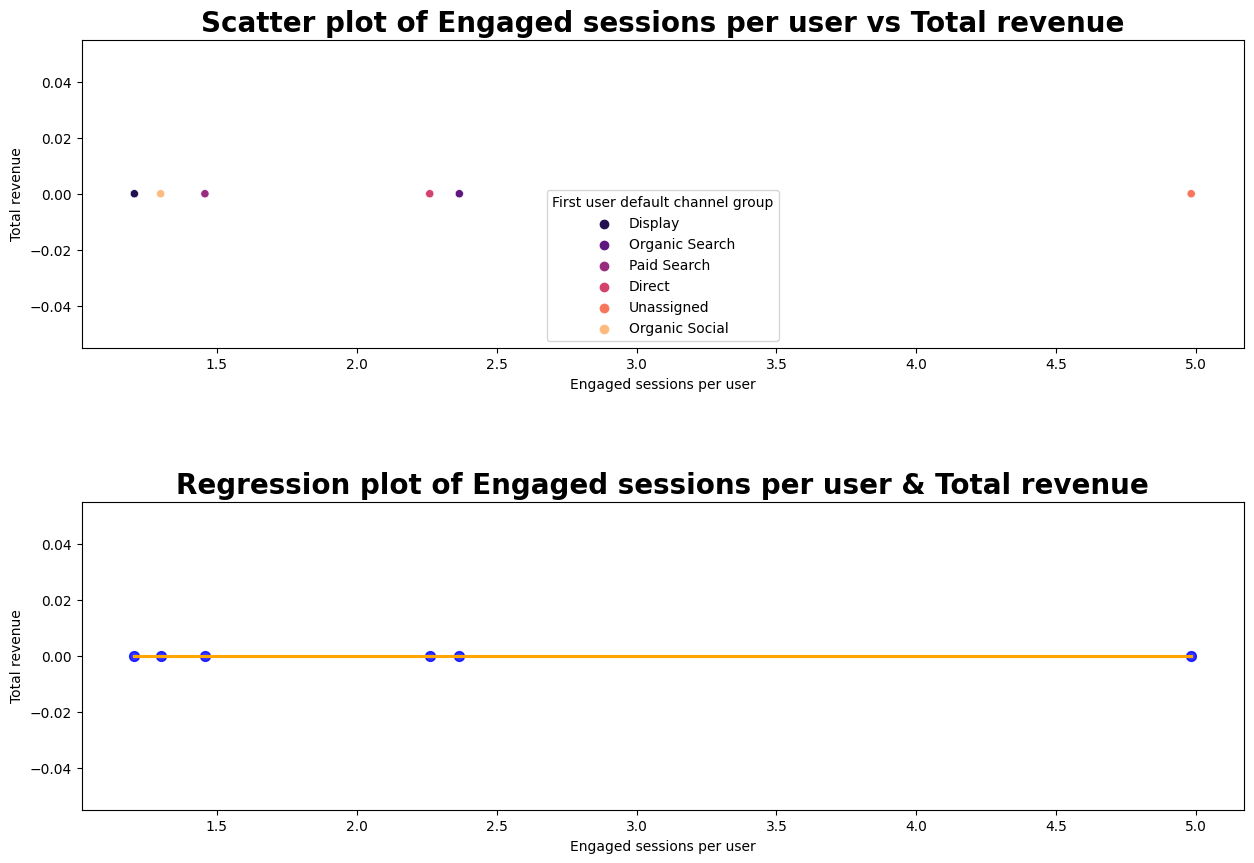

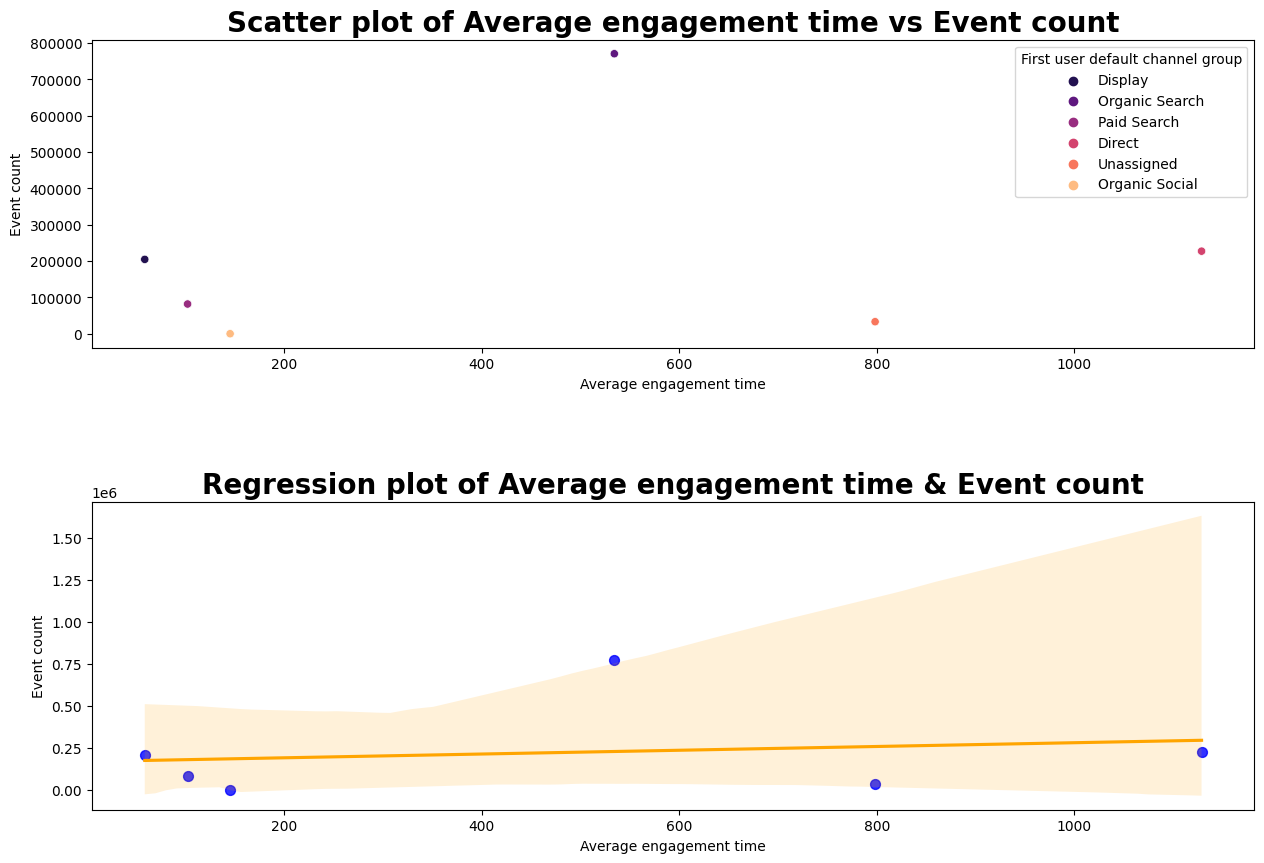

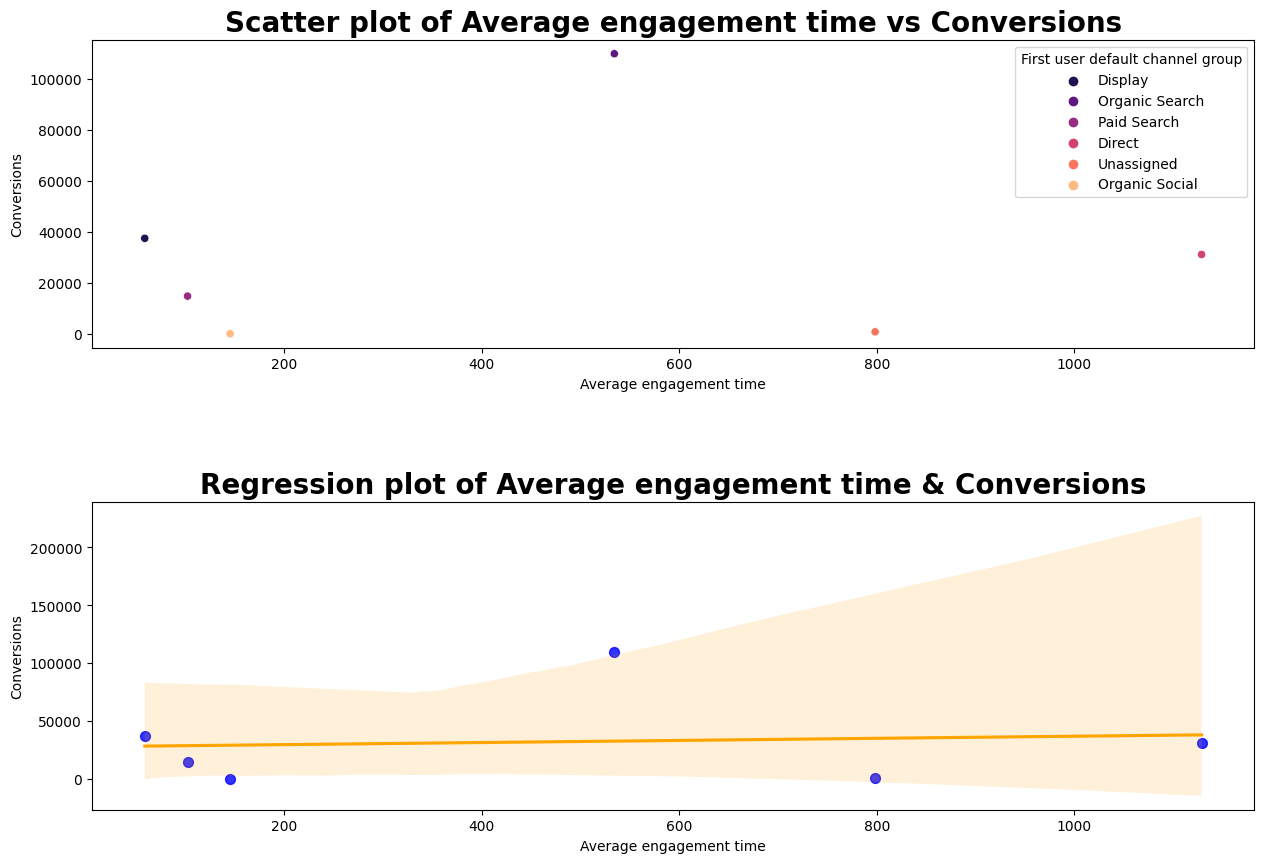

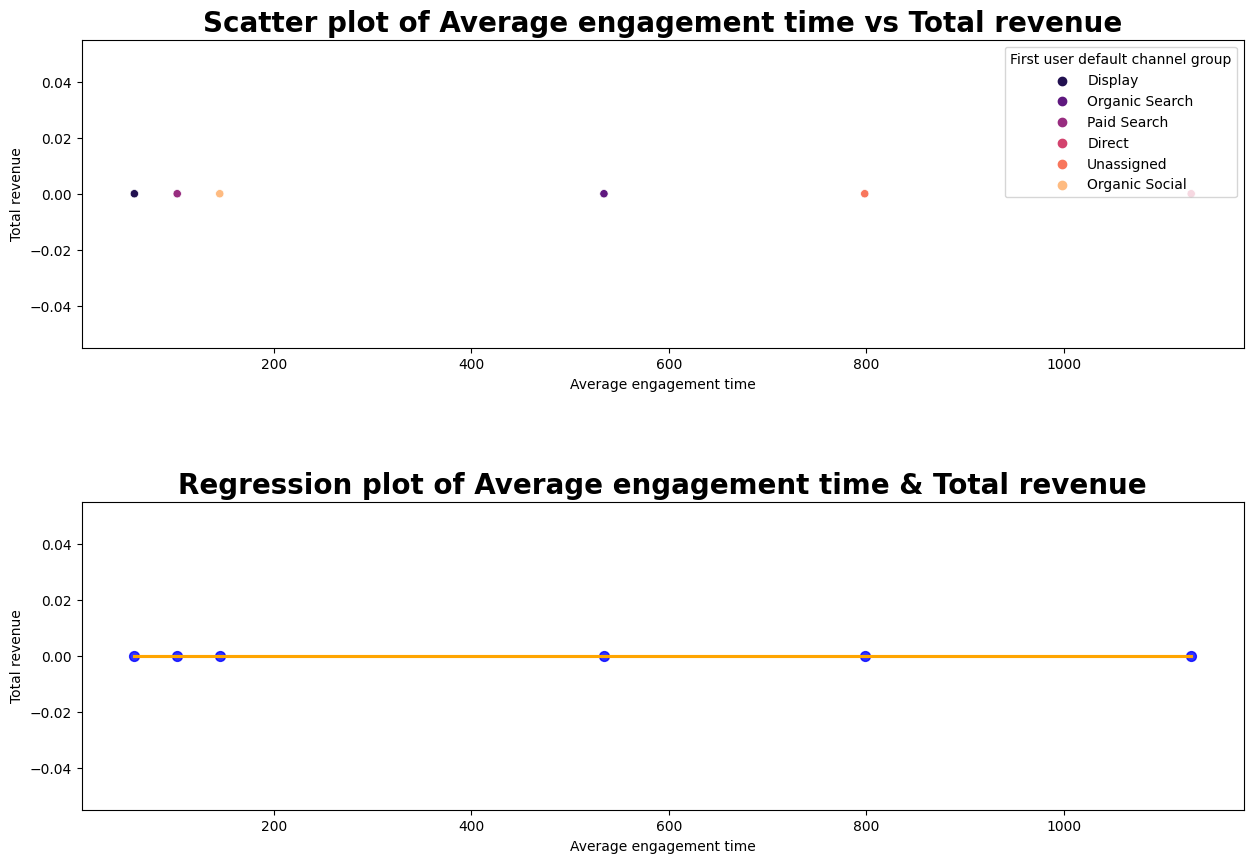

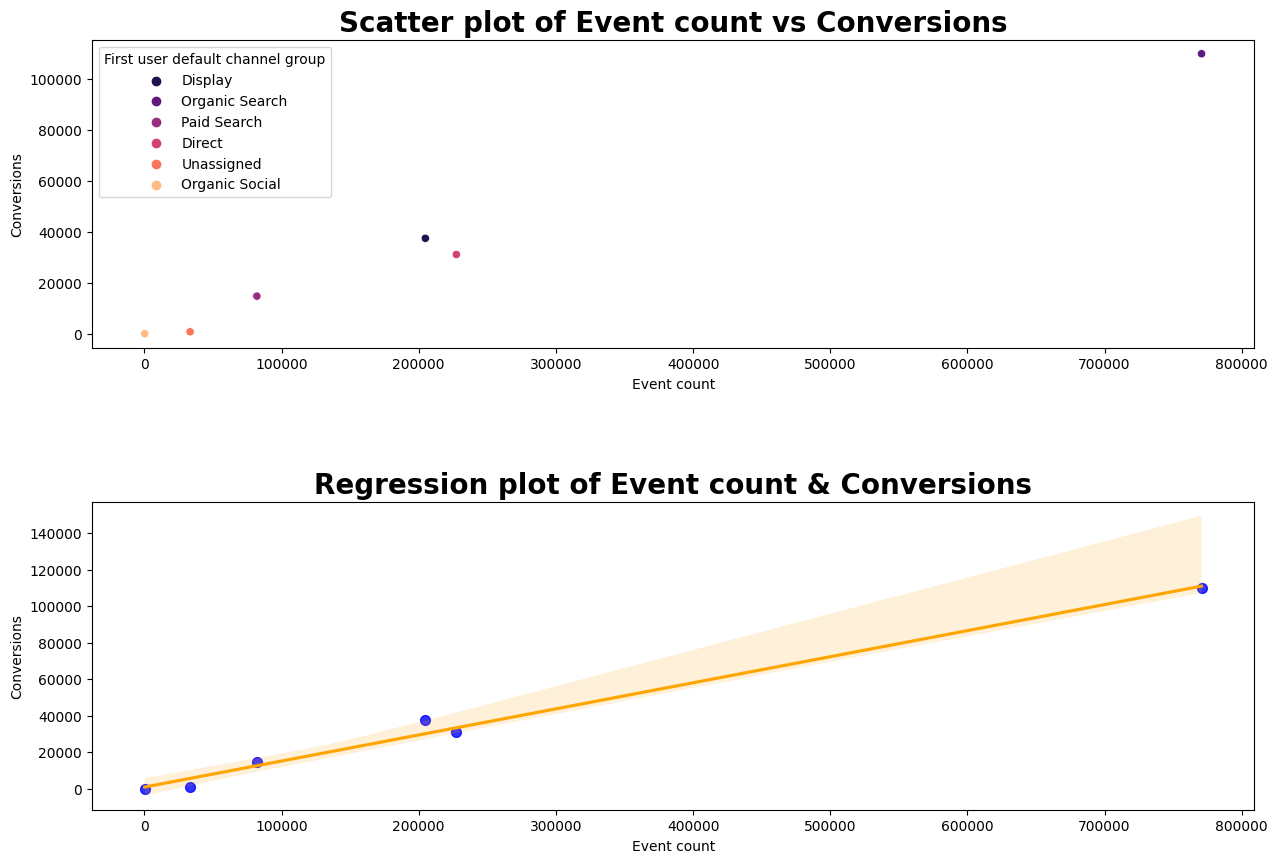

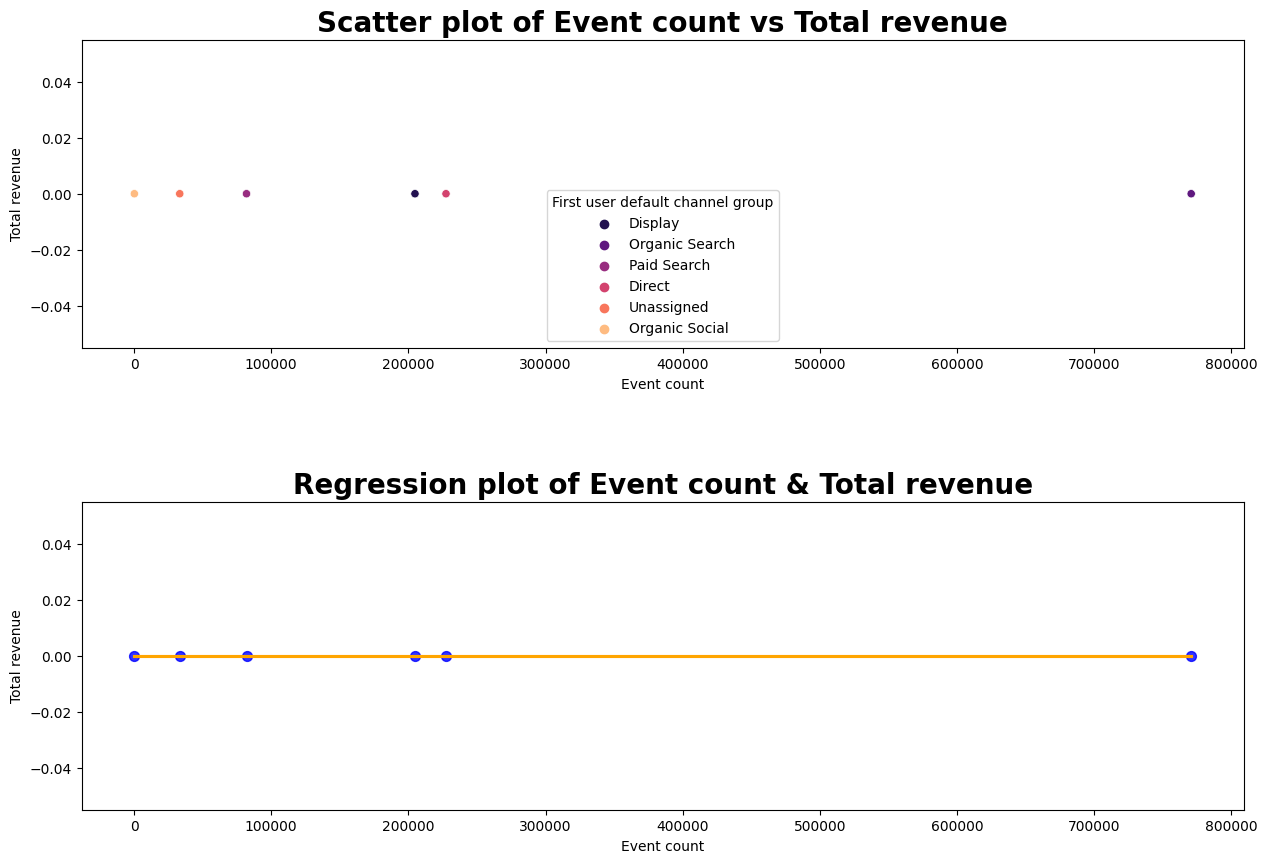

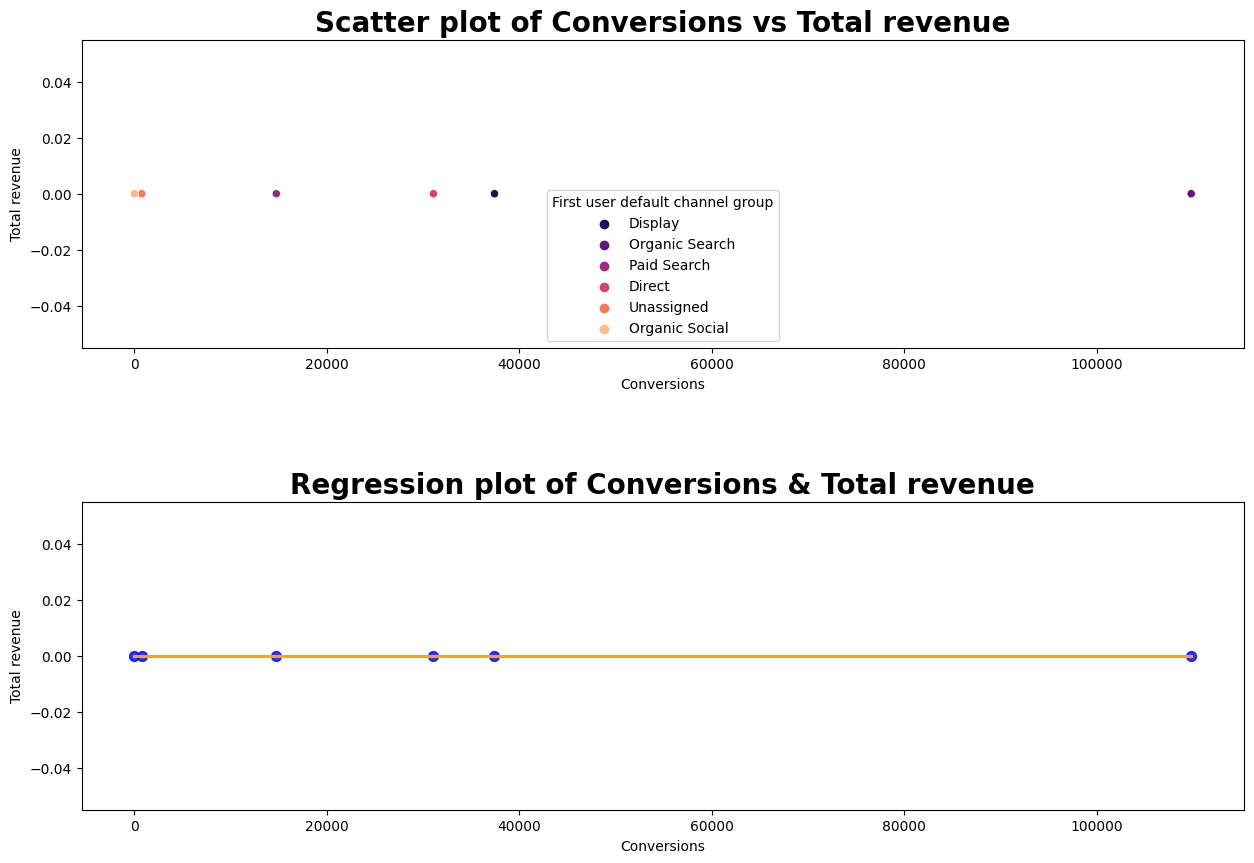

In [267]:
for x in combis:
  scatter_and_reg_plots(x[0],x[1])

In [207]:
def bar_plot(x):

  plt.figure(figsize=(10,3))
  plt.title(f"Barplot of First user default channel group & {x}",pad=25,fontweight='bold')

  fig=sns.barplot(data=data_user_aqs.sort_values(by=x),x=x,y='First user default channel group',palette='rocket')
  fig.bar_label(fig.containers[0],fontweight='bold',padding=5)       # Setting bar labels with percentage of conversion
  fig.spines[['right','top','bottom']].set_visible(False)            # Removing the chart junk
  fig.xaxis.set_visible(False)                                       # Hiding the x-axis

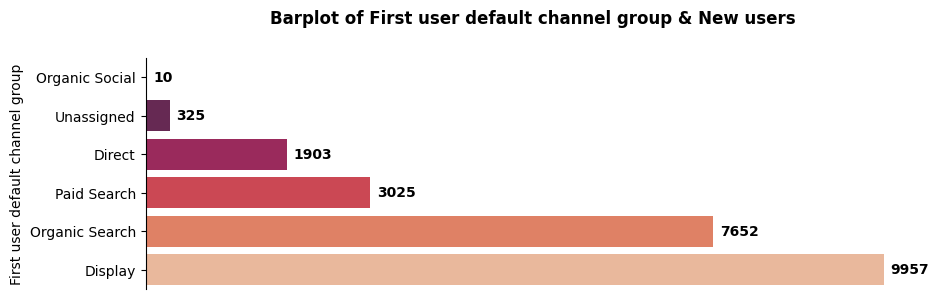

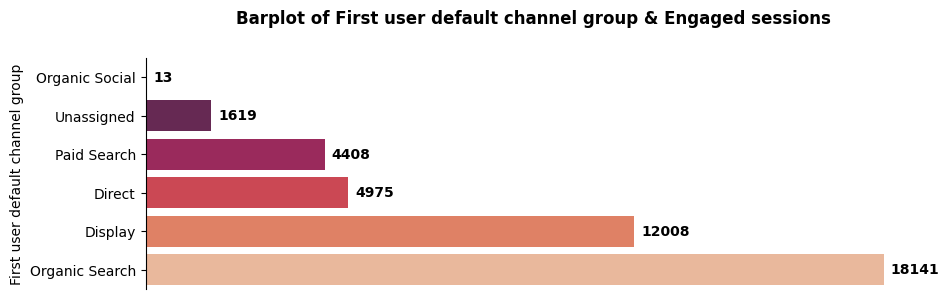

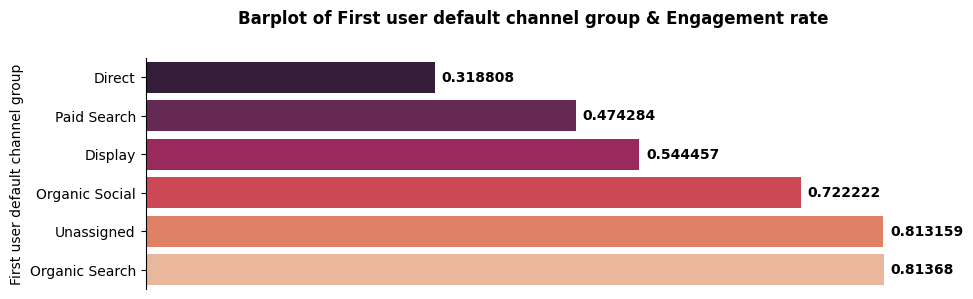

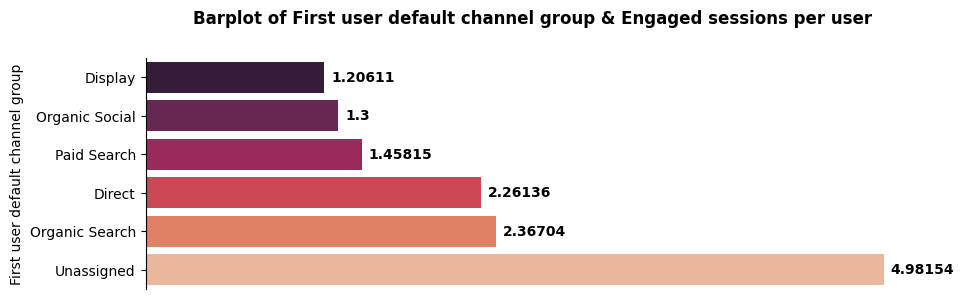

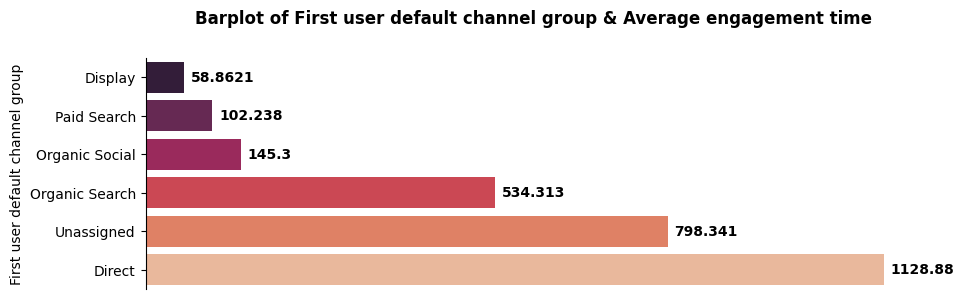

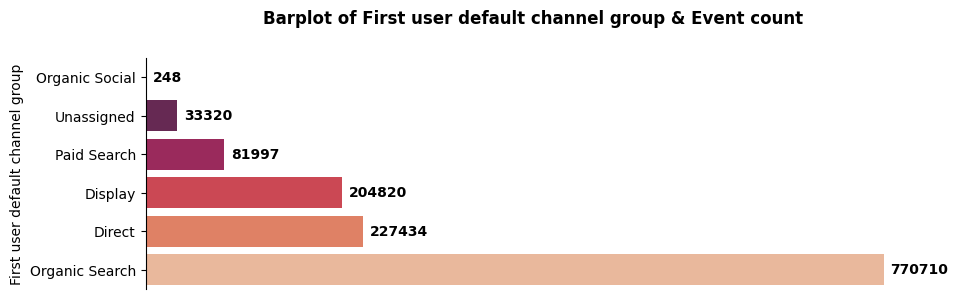

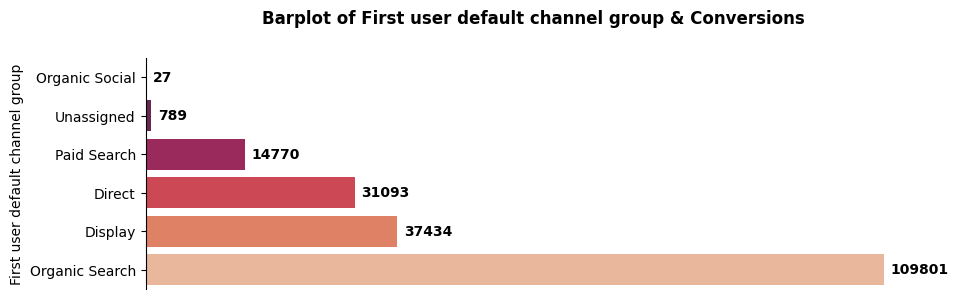

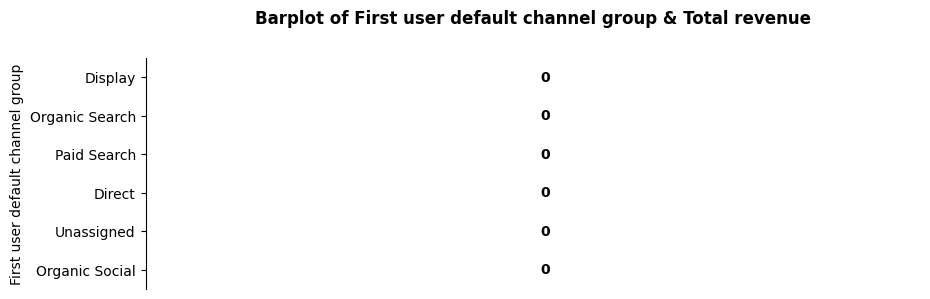

In [208]:
for x in numeric_cols:
  bar_plot(x)

In [197]:
correlation_matrix=data_user_aqs[['New users','Engaged sessions','Engagement rate','Engaged sessions per user','Average engagement time','Event count','Conversions']].corr()

<Axes: title={'center': 'Heatmap of correlation score of columns in User acquistion'}>

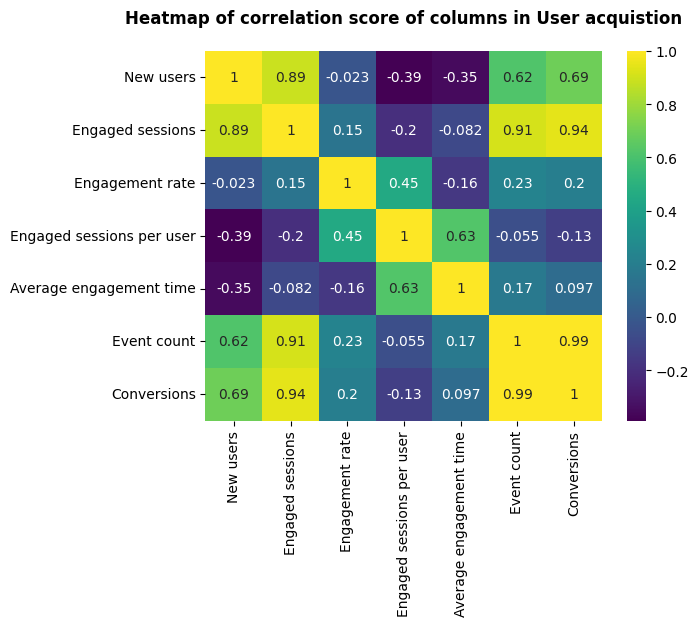

In [204]:
plt.title("Heatmap of correlation score of columns in User acquistion",pad=20,fontweight='bold')
sns.heatmap(data=correlation_matrix,annot=True,cmap='viridis')

**Good correlation score is observed between New users & Engaged sessions, Engaged sessions & Event count, Engaged sessions & Conversions, Event count & Conversions.**

In [233]:
def hist_and_bar_plots(x):
  fig,axes=plt.subplots(1,2,figsize=(30,7))

  sns.boxplot(data=data_user_aqs,x=x,palette='rocket',ax=axes[0]).set_title(f"Box plot of {x}",fontweight='bold',fontsize=20)
  sns.histplot(data=data_user_aqs,x=x,palette='seismic_r',kde=True,ax=axes[1]).set_title(f"Histogram of {x} Column",fontweight='bold',fontsize=20)

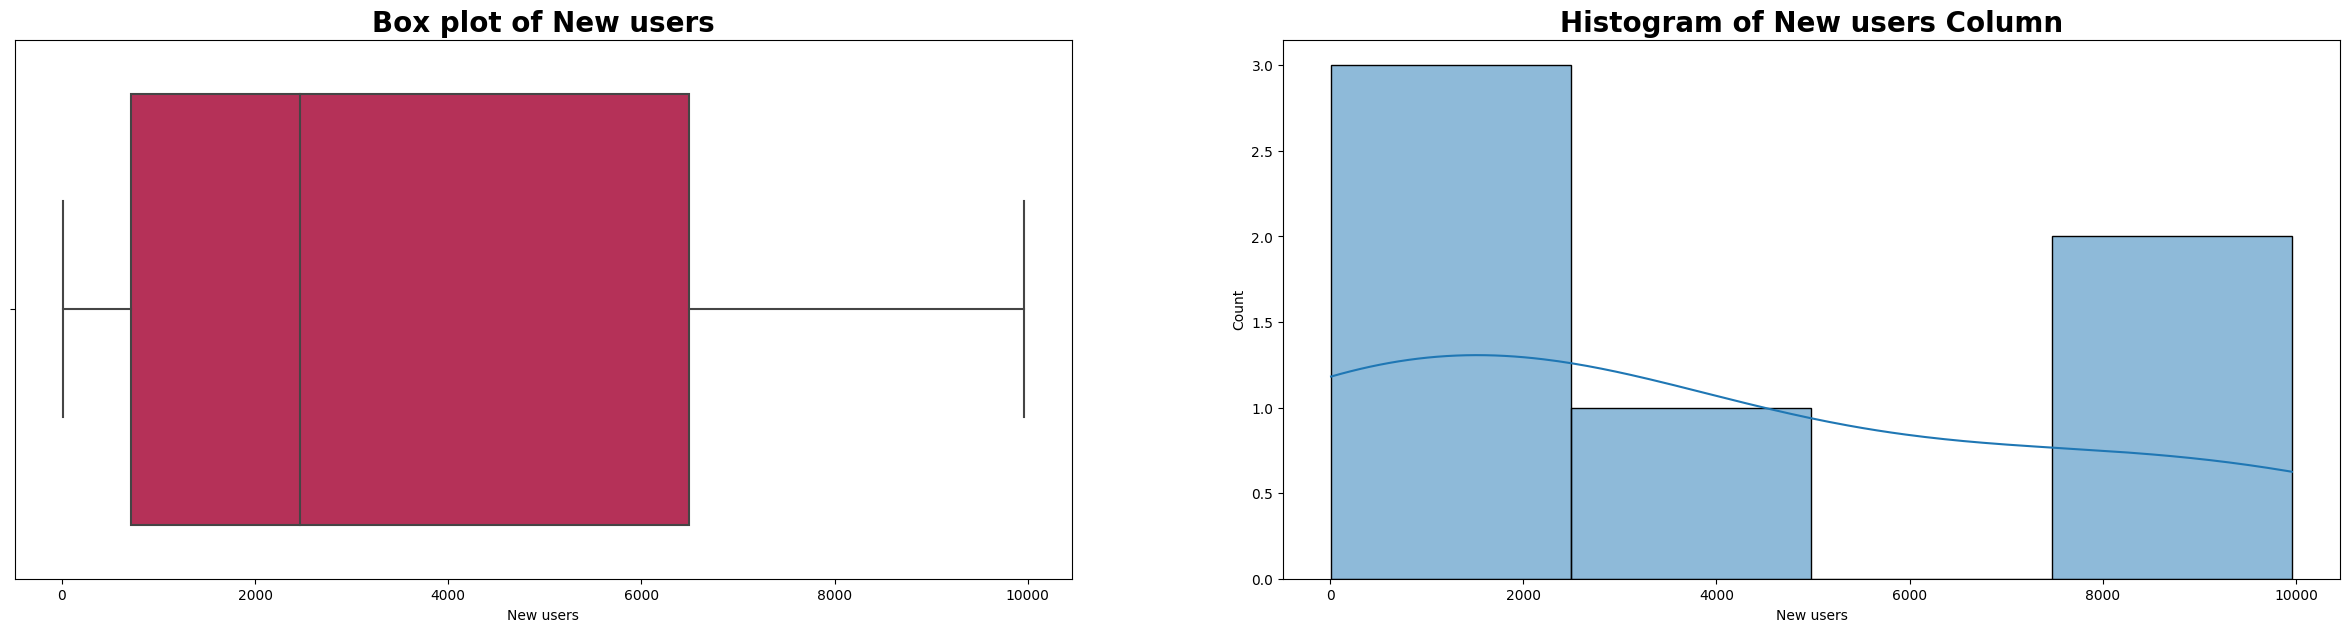

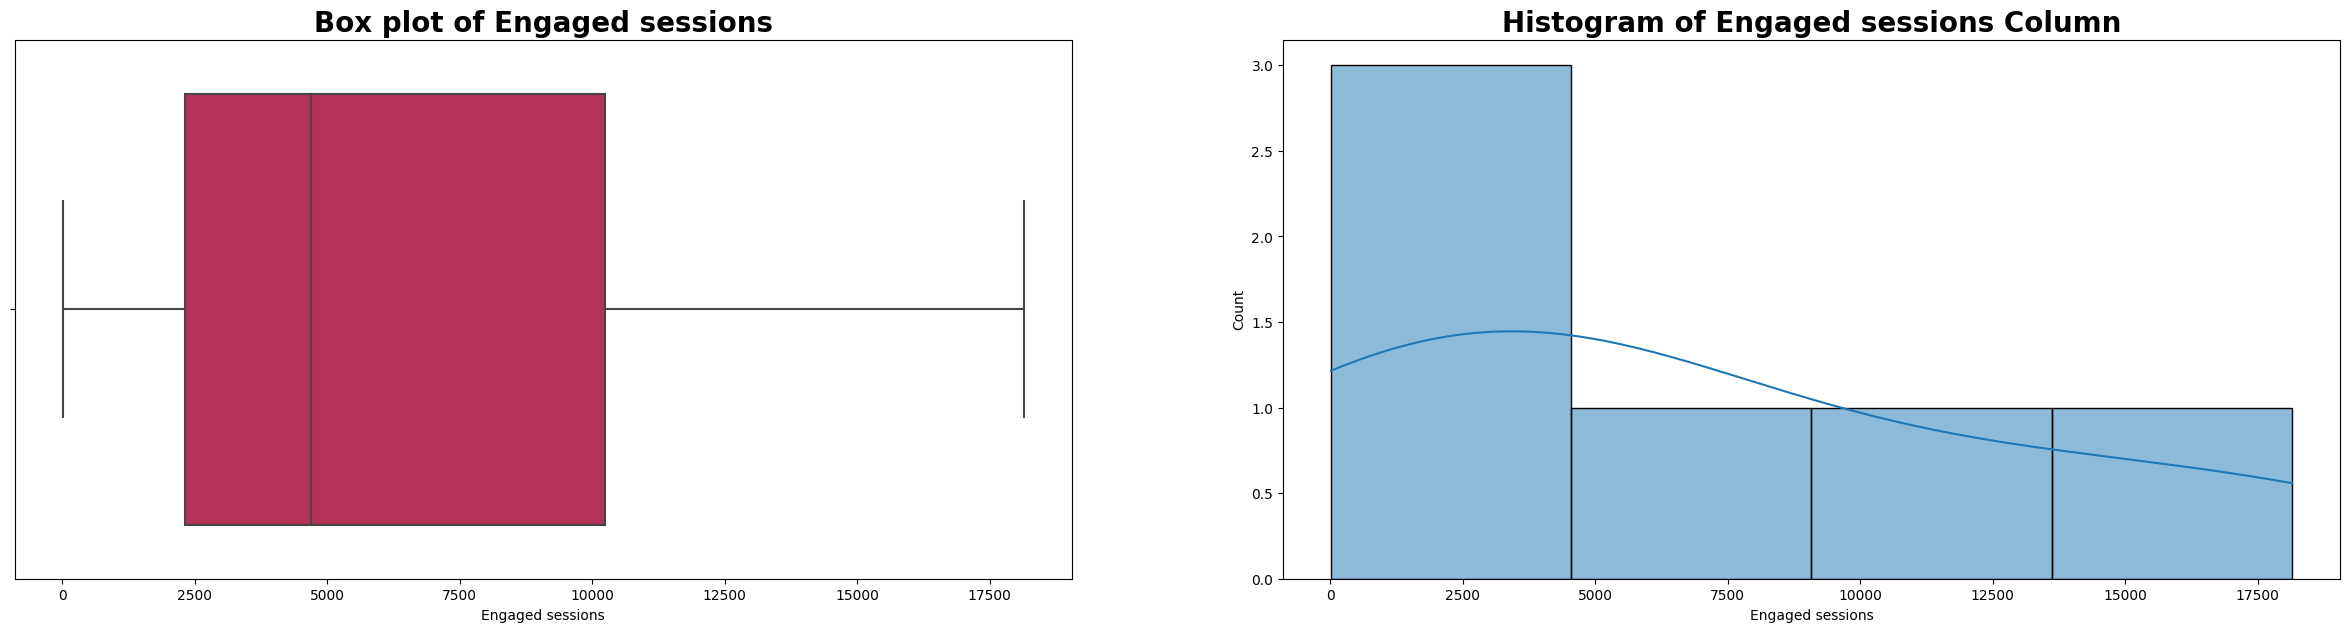

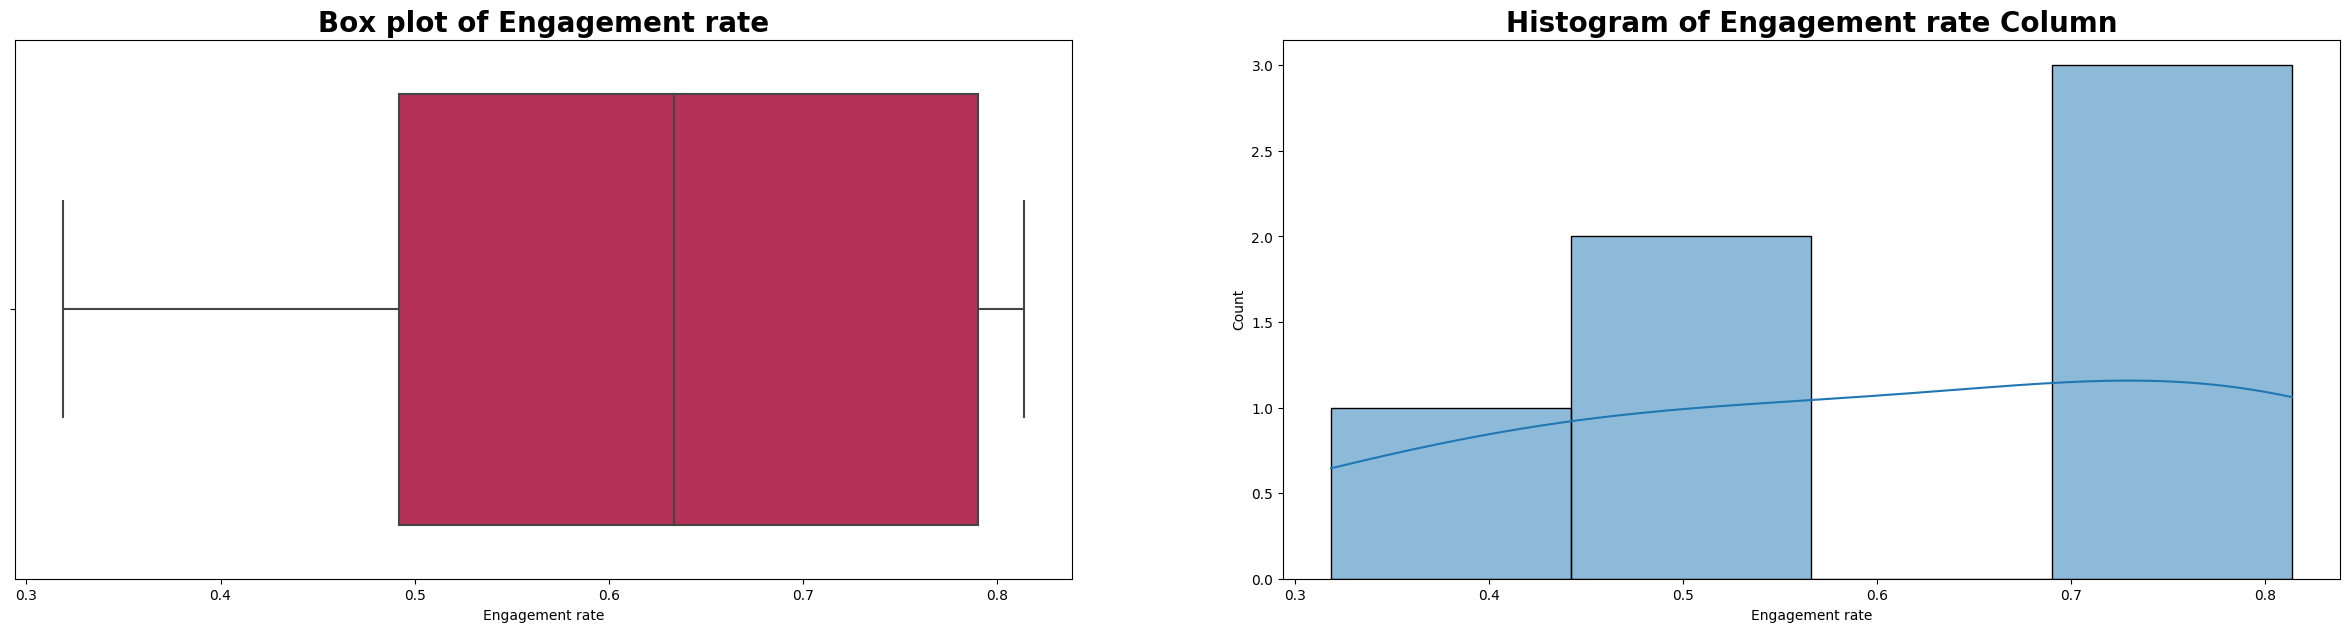

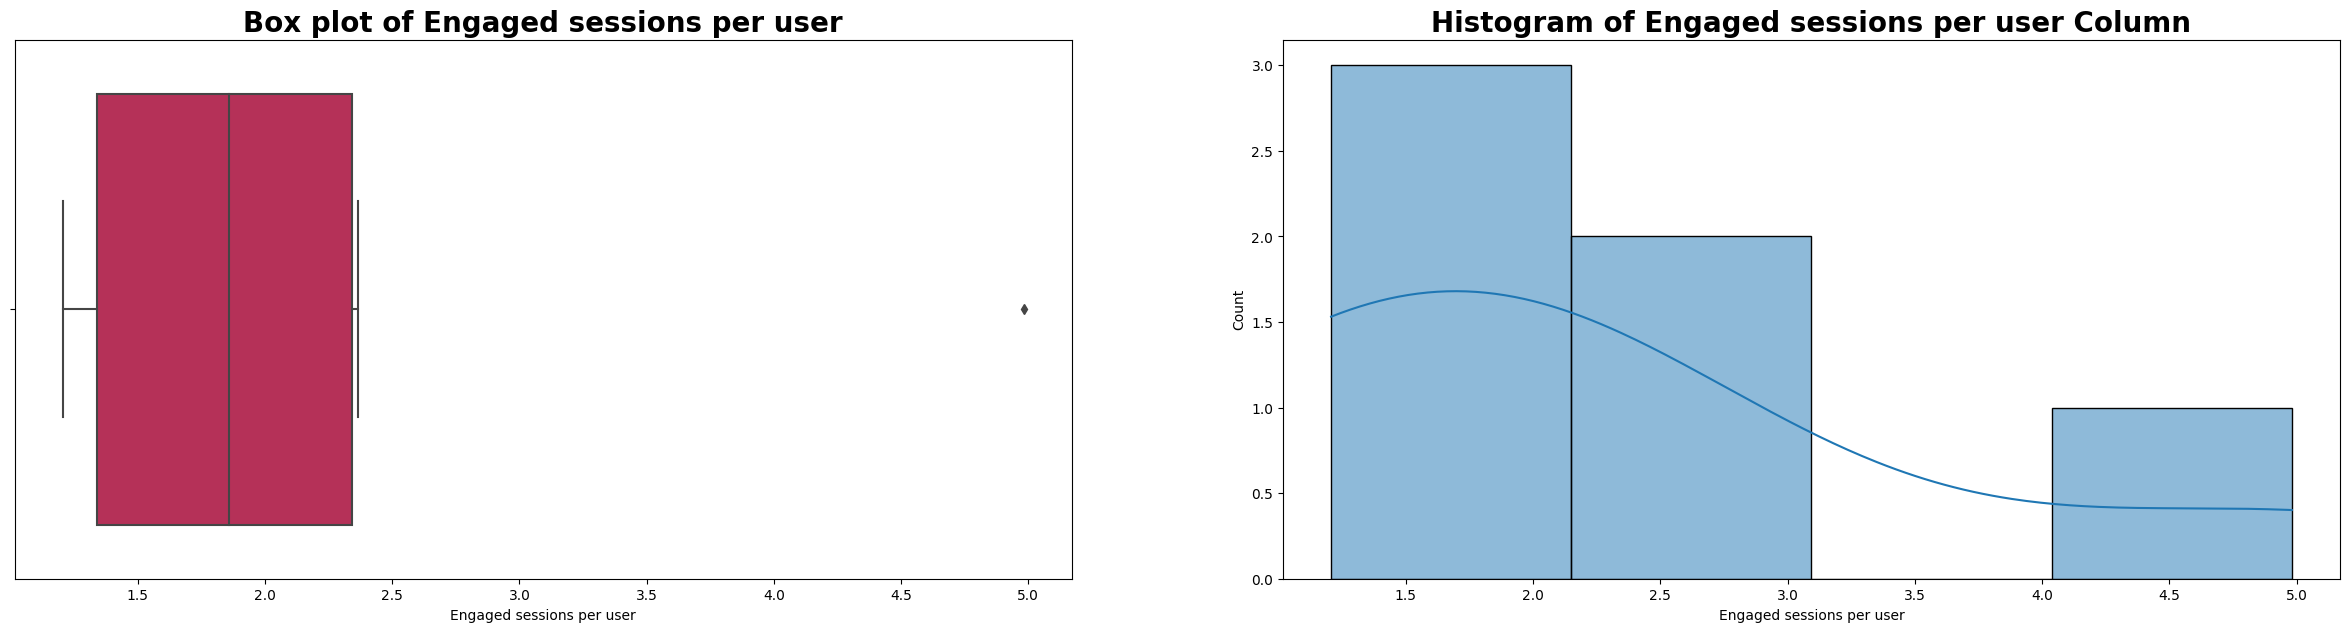

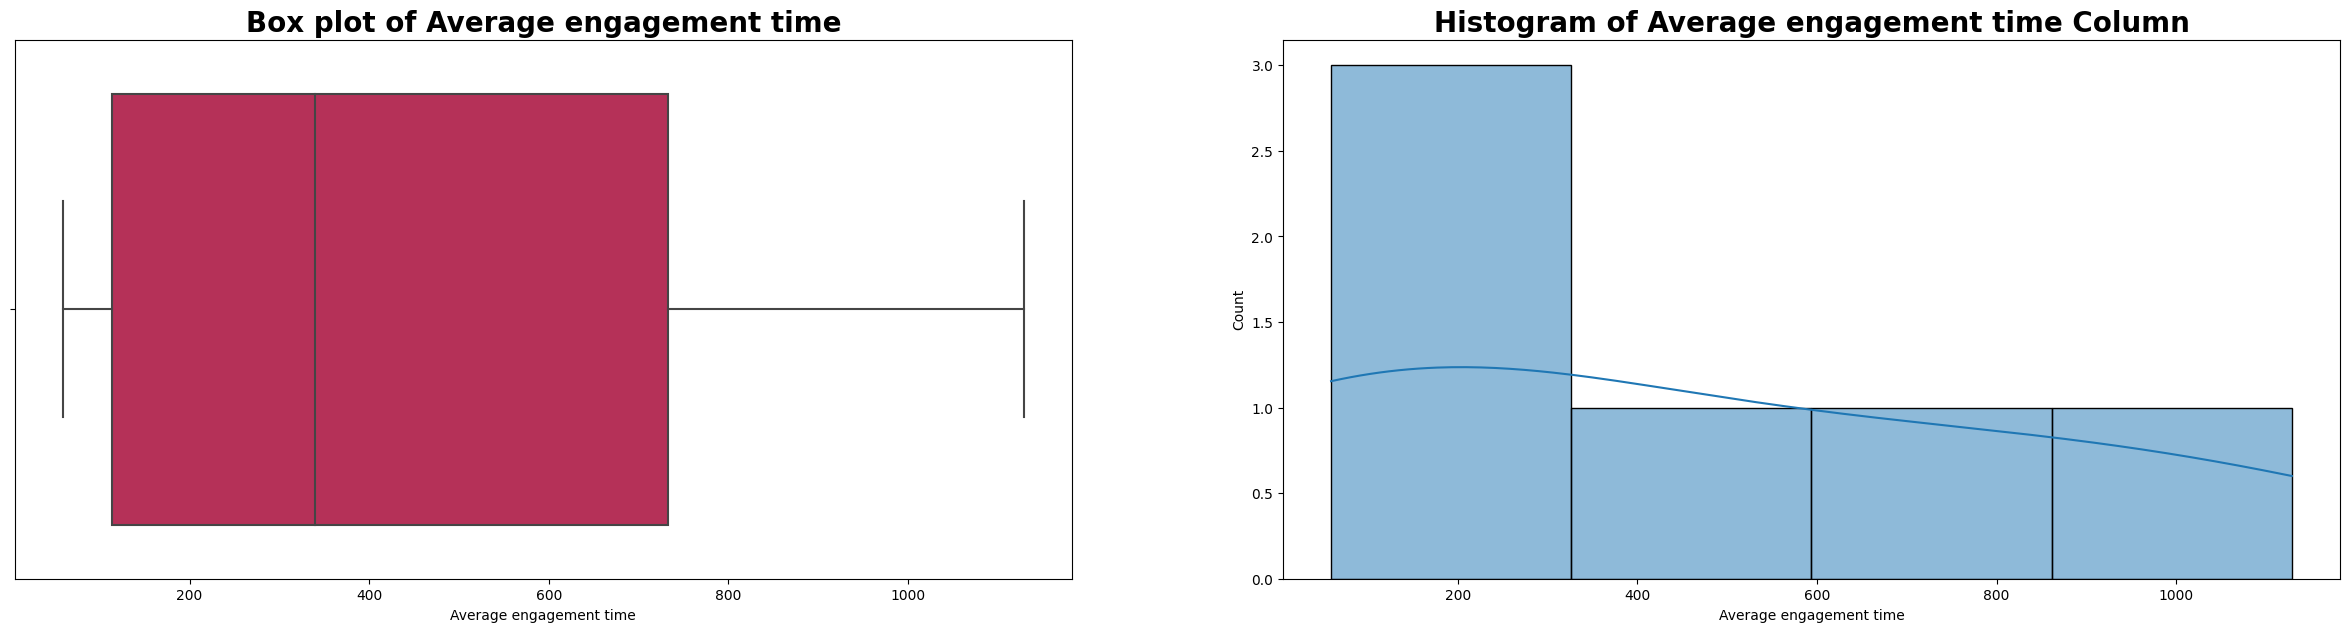

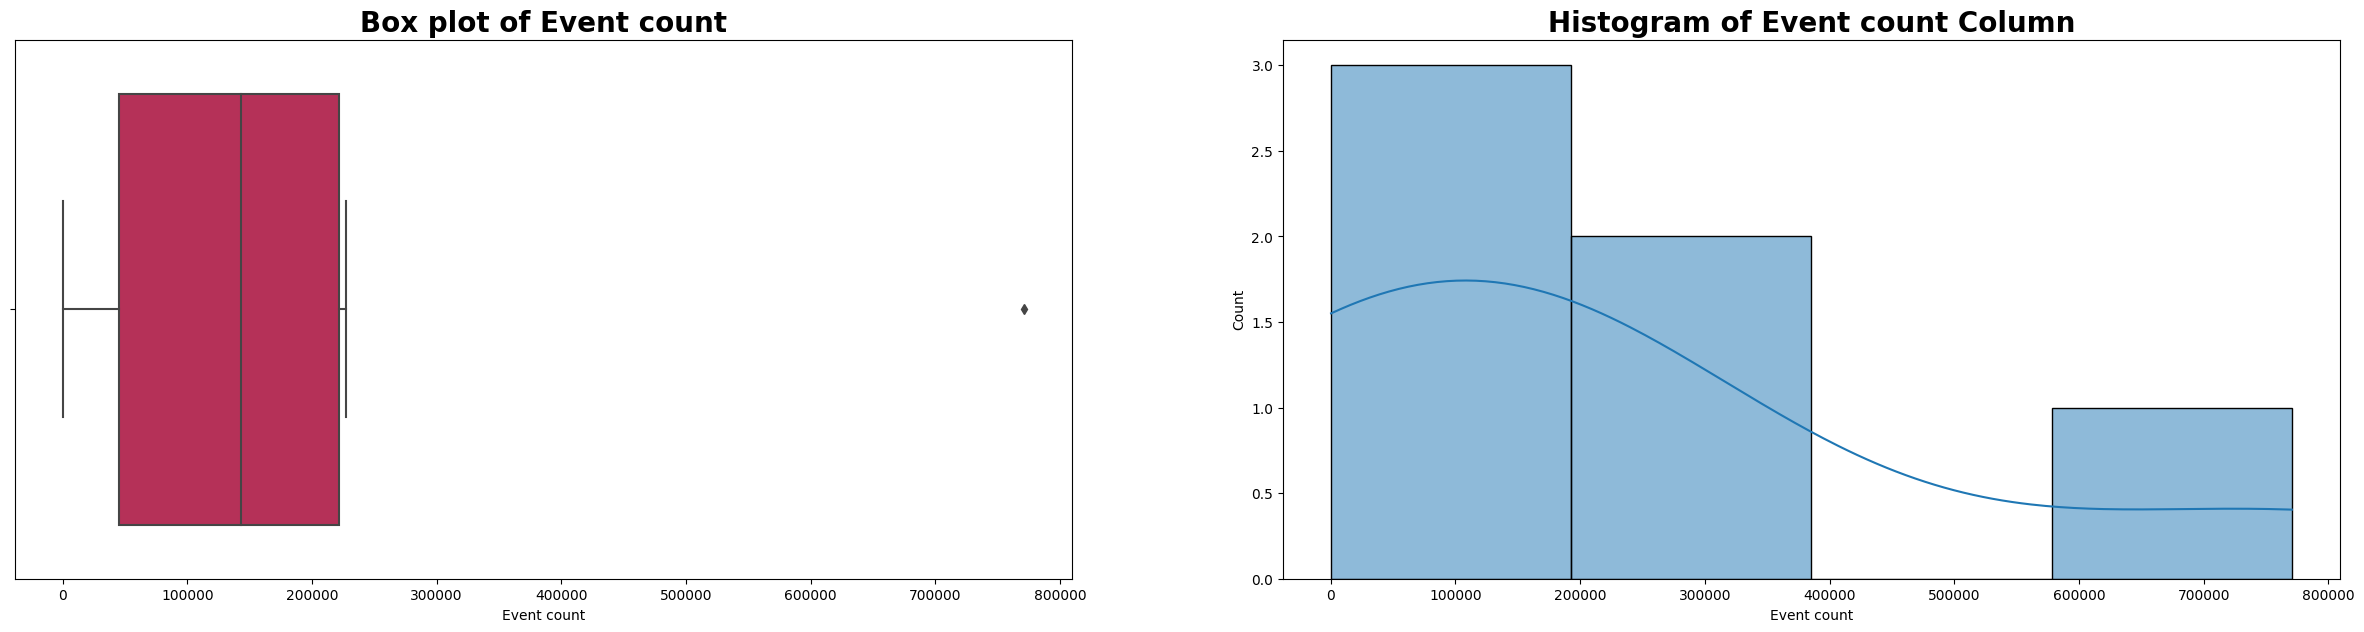

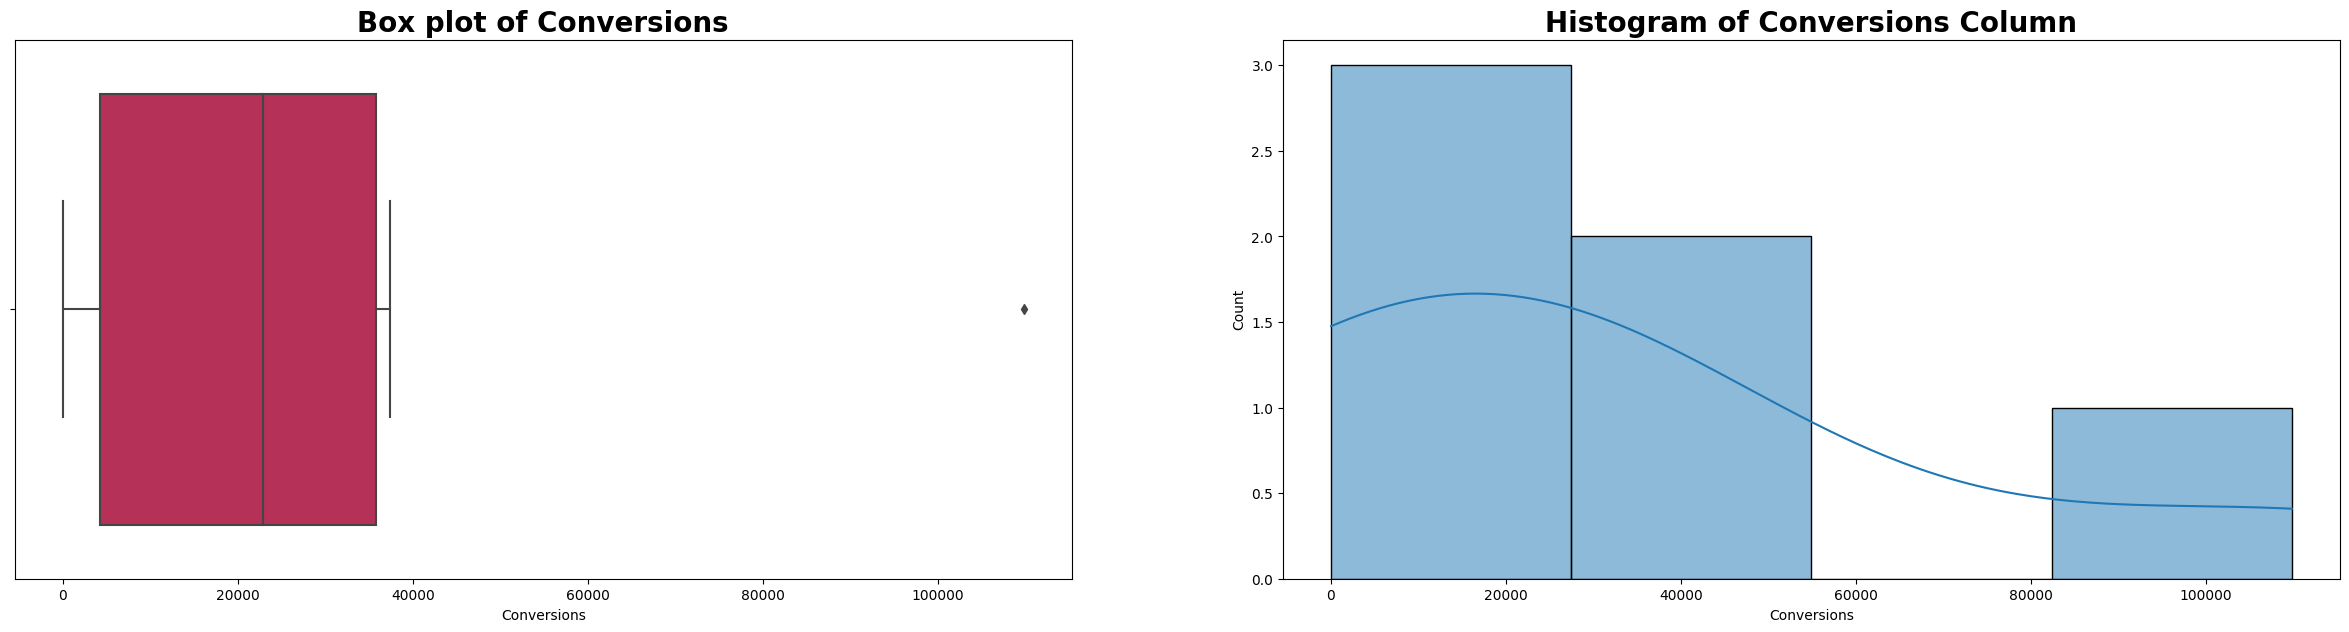

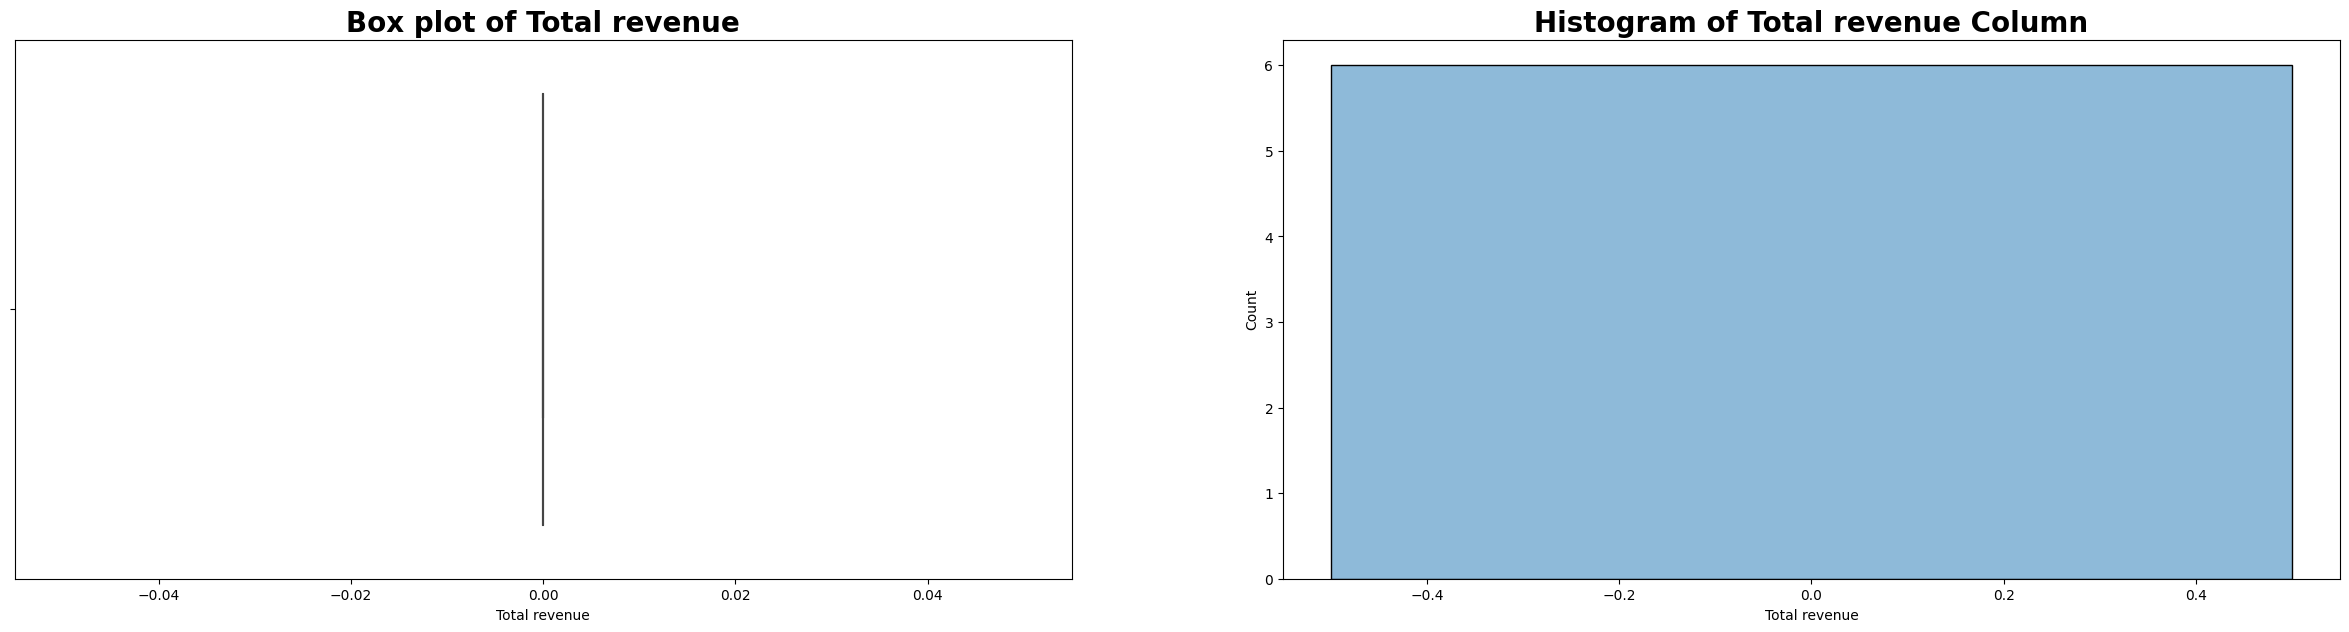

In [234]:
for x in numeric_cols:
  hist_and_bar_plots(x)

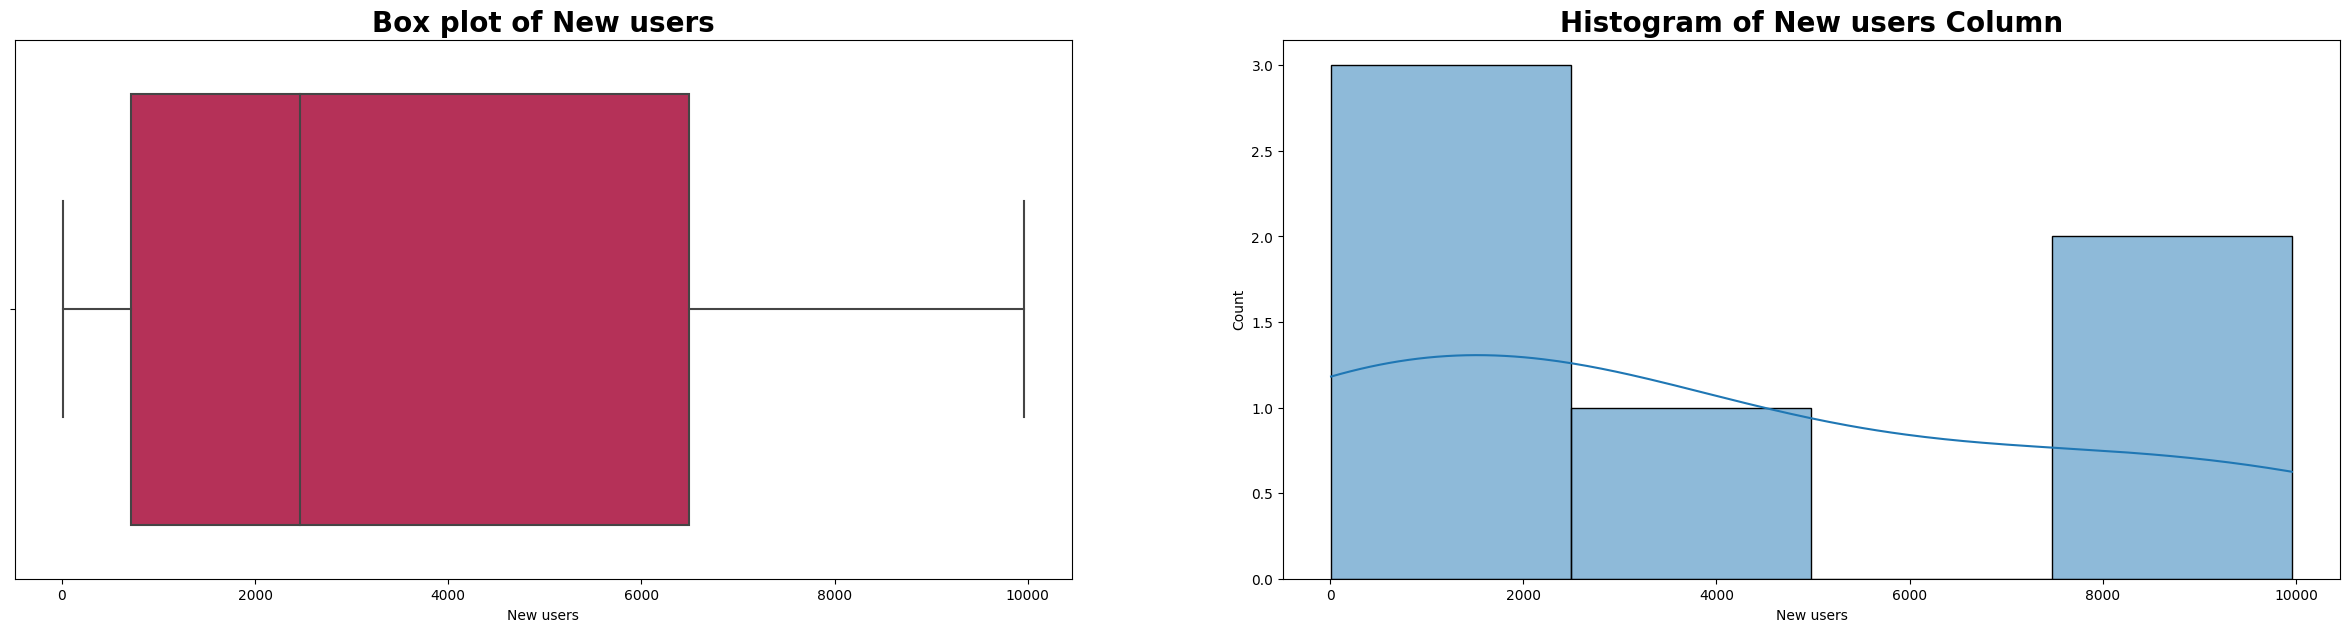

In [229]:
hist('New users')